# Project Title: Home Credit Default Risk

# Team and Project Meta-Information
## Group 32
- Carter Holmes `cartholm@iu.edu`
- Harsh Srivastava `hsrivas@iu.edu`
- Ritwik Budhiraja `rbudhira@iu.edu`
- Yash Shah `yashah@iu.edu`

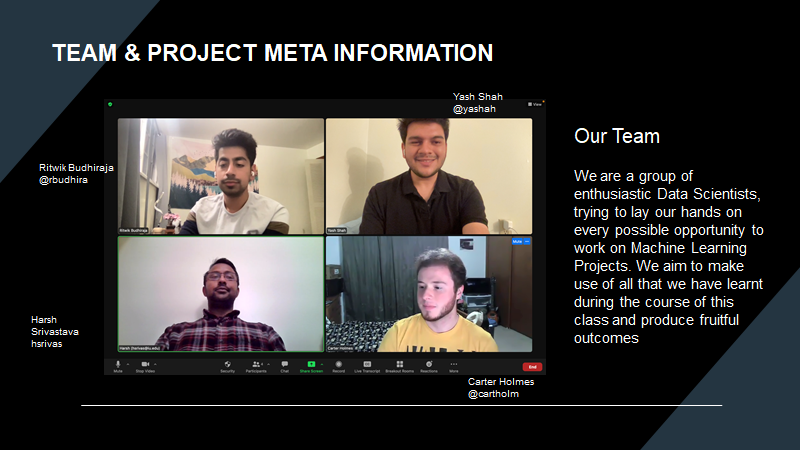

## ABSTRACT

Many people have a tough time getting loans because their credit histories are poor or non-existent. Untrustworthy lenders, unfortunately, may often take advantage of this demographic. Home Credit strives to enhance financial inclusion for the unbanked by promoting an enjoyable and secure borrowing experience. To guarantee that this underserved group has a positive loan experience, Home Credit employs a variety of alternative data, such as the person's background information, and machine learning algorithms to anticipate their clients' repayment potential. The goal of this project is to create an effective classification system for determining a client's financial ability to pay their debts. We have selected this data source as our final project for the course. To find the best solution, we will investigate a variety of machine learning methods, from traditional machine learning to deep learning, feature engineering, and hyperparameter searches; while using what we have learnt during the course – put to its best use. In Phase 1, we built a very basic model with two algorithms, logistic regression and random forest. In Phase 2, we find that the hyperparameter searches and feature engineering help us find a better model with an increased accuracy score. In Phase 3, we finish our final goal of building a model with an Artificial Neural Network. Through the last two phases we have tackled the problems like data processing issues and memory issues, that we have tackled by performing various data transformations and saving data into temporary files. As the final result of our Phase 3, we found out that the neural network we built gives an accuracy score of around 91.8% which we have selected for our final Kaggle submission. In this submission we got a score of 0.722 (public) and 0.709 (private).

# PROJECT DESCRIPTION
In this phase of the project, we primarily focused on building an Artificial Neural Network for attaining better accuracies on our training model. This was the main task that has been tackled in this phase. To find a model that was best suited for us, we had to work on various permutations and combinations of the number of layers, number of perceptrons, and the number of features which posed as a problem that we faced while building the ANN. We tried to implement five different models for the same (out of which three are not present in the code log), and decided to proceed with 18 features. We shall discuss the results of this model in the further sections.

## DATA DESCRIPTION

The HCDR data source consists of a cluster of nine ‘.csv’ files, as highlighted in the below image. Additionally, we have a large chunk of the remaining files that provide us with data about financial records of the applicants. To help with the labelling of data columns, there is also a column description ‘HomeCredit_columns_description.csv’ file present in the data source.

Here’s a link to the dataset: https://www.kaggle.com/c/home-credit-default-risk/data 

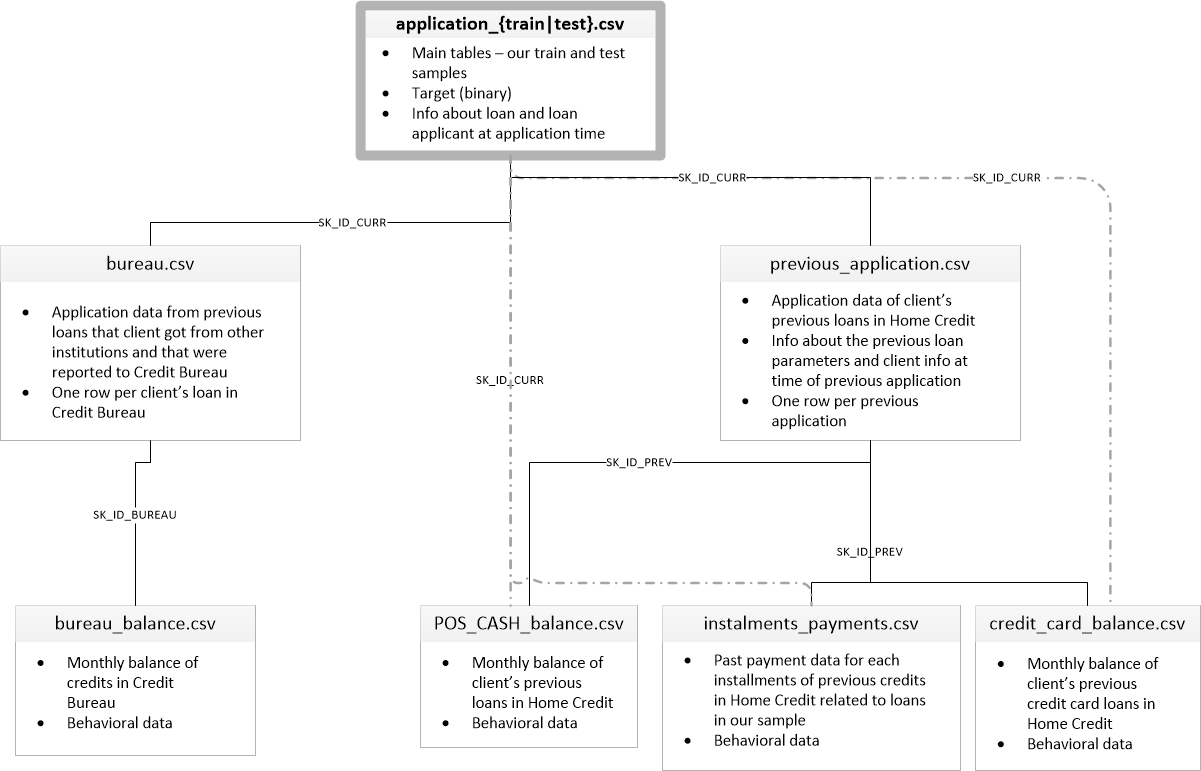

The files and their contents can be summarized as follows-
- **_application.csv_** \
  This is the core dataset, which is split into train and test datasets and includes information about loans and loan applicants at the time of application.

- **_bureau.csv_** \
  This file provides information on clients' loan histories that were reported to the Credit Bureau by institutes. In addition, in the Credit Bureau, there is one row dedicated to each client's loan. 

- **_bureau_balance.csv_** \
  This file contains the monthly balances of previous Credit Bureau credits. 

- **_previous_application.csv_** \
  This file contains information about the applicant's previous loan in Home credit, as well as past loan parameters and the applicant's personal information at the time. 

- **_POS_CASH_balance.csv_** \
  This file contains monthly balances from the applicant's previous point of sales (POS) and loans in the form of cash from Home Credit.

- **_installments_payments.csv_** \
  This file comprises clients' previous payment history for each installment for previous Home Credit credits related to the loan granted to them. 

- **_credit_card_balance.csv_** \
  This file contains snapshots of monthly balances from a client's previous Home Credit credit card history.

# Mount Google Drive on Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting the Dataset from Kaggle

In [ ]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pwd


/root/shared/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [ ]:
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
bureau.csv                          162MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  


In [ ]:
DATA_DIR = "../data"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory ‘../data’: File exists


In [ ]:
!ls -l $DATA_DIR

total 704704
-rw-r--r-- 1 root root 721616255 Apr 12 00:08 home-credit-default-risk.zip


In [ ]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

100%|███████████████████████████████████████▉| 688M/688M [03:25<00:00, 2.37MB/s]
100%|████████████████████████████████████████| 688M/688M [03:26<00:00, 3.50MB/s]


In [ ]:
import zipfile

In [ ]:
unzippingReq = True
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(DATA_DIR + '/home-credit-default-risk.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

# Imports

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [ ]:
datasets = {}

In [ ]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    # print(df.info())
    # display(df.head(5))
    return df

def load_datasets():
    HOME = "/content/drive/MyDrive/Group32_AML"
    DATA_DIR = HOME + "/datasets/"
    ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
                "previous_application","POS_CASH_balance")

    for ds_name in ds_names:
        datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

load_datasets()

application_train: shape is (307511, 122)
application_test: shape is (48744, 121)
bureau: shape is (1716428, 17)
bureau_balance: shape is (27299925, 3)
credit_card_balance: shape is (3840312, 23)
installments_payments: shape is (13605401, 8)
previous_application: shape is (1670214, 37)
POS_CASH_balance: shape is (10001358, 8)


In [ ]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [ ]:
df_train = datasets["application_train"]
df_test = datasets["application_test"]

~~Make a copy of this data and use it for processing~~

In [ ]:
# df_train_copy = df_train_original.copy()
# df_test_copy = df_test_original.copy()

In [ ]:
print("\n".join(df_train.columns))

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

### Checkout the `application_train` data

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Checkout the `application_test`

In [ ]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


# Find and Handle Missing Data

In [ ]:
train_count = len(df_train)
train_count

307511

Find missing value counts with `isnull()`

In [ ]:
missing_counts = df_train.isnull().sum().sort_values(ascending=False) # * 100.0 / train_count
missing_counts

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

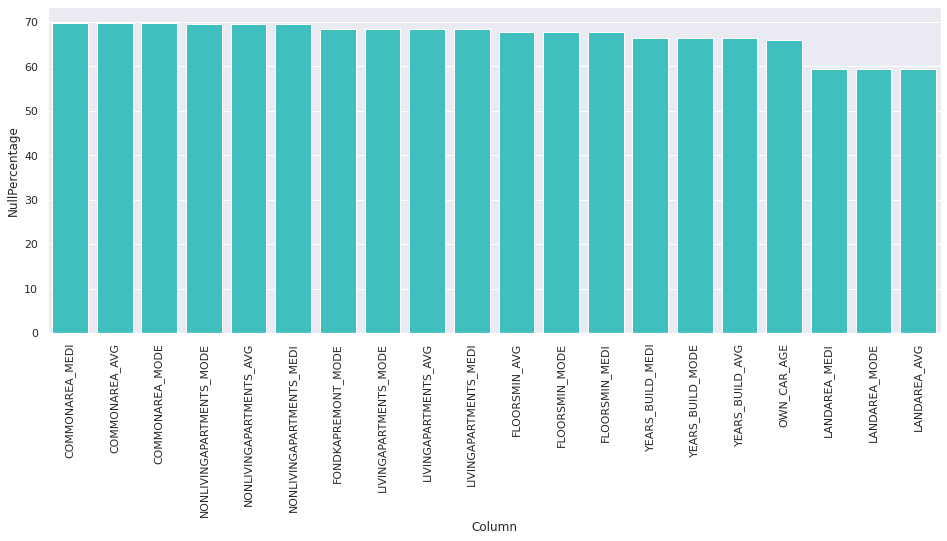

In [ ]:
missing_counts_percent = missing_counts * 100.0 / train_count
missing_counts_percent_top_20 = missing_counts_percent.head(20)
missing_counts_percent_top_20 = pd.DataFrame(data=zip(missing_counts_percent_top_20.index, missing_counts_percent_top_20.values),
                                             columns=["Column", "NullPercentage"])

sns.set(rc={'figure.figsize':(16,6)})
missing_counts_percent_top_20_barplot = sns.barplot(x="Column", y="NullPercentage", data=missing_counts_percent_top_20,
                                                    color="aqua", saturation=.5)
missing_counts_percent_top_20_barplot.set_xticklabels(missing_counts_percent_top_20_barplot.get_xticklabels(), rotation=90)
missing_counts_percent_top_20_barplot

Drop all columns that have a threshold of `missing_counts.max()`

In [ ]:
threshold_cutoff_non_na = train_count - missing_counts.max() / 2

In [ ]:
df_train.dropna(axis=1, thresh=threshold_cutoff_non_na, inplace=True)

## Drop Columns

Drop zero valued columns above 70% threshold

In [ ]:
def drop_zeroes_threshold(df, threshold):
    num_zeroes = pd.DataFrame()

    columns = []
    percentage = []

    for col in df.columns:
        if col == 'TARGET':
            continue
        count = (df[col] == 0).sum()
        columns.append(col)
        percentage.append(count / len(df[col]))
    
    num_zeroes['Column'] = columns
    num_zeroes['Percentage'] = percentage
    num_zeroes = num_zeroes[num_zeroes['Percentage'] > threshold]
    return num_zeroes

In [ ]:
above_75_zeroes = drop_zeroes_threshold(df_train, 0.75)
above_75_zeroes

,Column,Percentage
22,FLAG_WORK_PHONE,0.800632
25,FLAG_EMAIL,0.943280
32,REG_REGION_NOT_LIVE_REGION,0.984856
33,REG_REGION_NOT_WORK_REGION,0.949231
34,LIVE_REGION_NOT_WORK_REGION,0.959341
35,REG_CITY_NOT_LIVE_CITY,0.921827
36,REG_CITY_NOT_WORK_CITY,0.769546
37,LIVE_CITY_NOT_WORK_CITY,0.820445
42,DEF_30_CNT_SOCIAL_CIRCLE,0.882323
44,DEF_60_CNT_SOCIAL_CIRCLE,0.912881


In [ ]:
df_train.drop(columns = above_75_zeroes['Column'], inplace = True)

Drop nan/null valued columns above 35% threshold

In [ ]:
def drop_nulls_threshold(df, threshold):
    num_nulls = pd.DataFrame()

    columns = []
    percentage = []

    for col in df.columns:
        if col == 'TARGET':
            continue
        count = df[col].isnull().sum()
        columns.append(col)
        percentage.append(count / len(df[col]))
    
    num_nulls['Column'] = columns
    num_nulls['Percentage'] = percentage
    num_nulls = num_nulls[num_nulls['Percentage'] > threshold]
    return num_nulls

Get all columns above 30% nulls

In [ ]:
above_35_nulls = drop_nulls_threshold(df_train, 0.35)
above_35_nulls

,Column,Percentage


In [ ]:
df_train.drop(columns = above_35_nulls['Column'], inplace = True)

In [ ]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,307510.000000,307511.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,12.063419,5.143927e-01,0.510853,1.422245,1.405292,-962.858788,0.710023,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,3.265832,1.910602e-01,0.194844,2.400989,2.379803,826.808487,0.453752,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,8.173617e-08,0.000527,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,10.000000,3.924574e-01,0.370650,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,12.000000,5.659614e-01,0.535276,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,14.000000,6.636171e-01,0.669057,2.000000,2.000000,-274.000000,1.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,23.000000,8.549997e-01,0.896010,348.000000,344.000000,0.000000,1.000000,27.000000,261.000000,25.000000


Check and drop any rows that have values not present in test data since we won't be able to convert them properly during test

In [ ]:
def drop_non_existing_in_test(df_train, df_test):
    for col in df_train.columns:
        if col in df_test.columns and df_train[col].dtype == np.dtype("O"):
            unique_in_train = df_train[col].unique()
            unique_in_test = df_test[col].unique()
            for value in unique_in_train:
                if value not in unique_in_test:
                    df_train = df_train[df_train[col] != value]
    return df_train

In [ ]:
df_train = drop_non_existing_in_test(df_train, df_test)
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.262949,0.139376,2.0,2.0,-1134.0,1,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.622246,NaN,1.0,1.0,-828.0,1,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.555912,0.729567,0.0,0.0,-815.0,0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,0.650442,NaN,2.0,2.0,-617.0,1,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.322738,NaN,0.0,0.0,-1106.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Services,0.681632,NaN,0.0,0.0,-273.0,0,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,XNA,0.115992,NaN,0.0,0.0,0.0,1,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,School,0.535722,0.218859,6.0,6.0,-1909.0,1,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Business Entity Type 1,0.514163,0.661024,0.0,0.0,-322.0,1,0.0,0.0,0.0


According to the above result a total of `11 rows` got removed from the dataset

## Summarize the columns that remain

In [ ]:
df_train.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
OCCUPATION_TYPE          

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307500.0,278181.087798,102789.822017,1.000020e+05,189146.750000,278202.500000,367143.250000,4.562550e+05
TARGET,307500.0,0.080725,0.272413,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307500.0,0.417034,0.722108,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307500.0,168797.123450,237126.307223,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307500.0,599025.945351,402493.590146,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307488.0,27108.477604,14493.600189,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307224.0,538394.285593,369445.877860,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307500.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307500.0,-16037.069246,4363.988872,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307500.0,63817.429333,141277.730537,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


# EXPLORATORY DATA ANALYSIS + FEATURE ENGINEERING

## What is the distribution of loan applications according to gender?

F    202443
M    105057
Name: CODE_GENDER, dtype: int64


Text(0.5, 1.0, 'Information Ratio w.r.t. Gender')

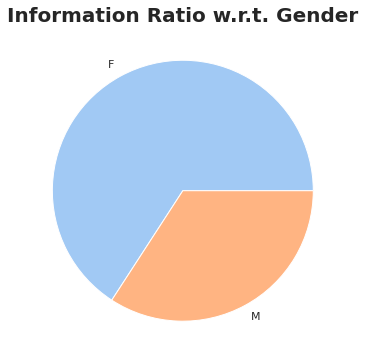

In [ ]:
df_gender = df_train["CODE_GENDER"]
df_gender_labels = df_gender.unique()
df_gender_labels.sort()
print(df_gender.value_counts())
plt.pie(df_gender.value_counts(), colors=sns.color_palette("pastel"), labels=df_gender_labels)
plt.title("Information Ratio w.r.t. Gender", fontweight="bold", fontsize="20")

<div style="border: 1px solid #3498DB; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: #a1c9f4; color: darkblue;">
    <h4>Inference</h4>
    The number of females applying for a loan is much higher than that of men according to the pie chart above.
</div>

## What is the distribution of loan repayment according to gender?

Text(0.5, 1.0, 'Loan repayment to Gender')

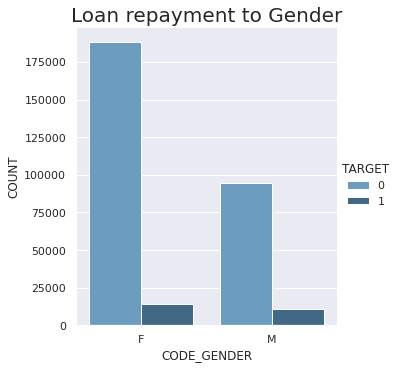

In [ ]:
af = df_train[["CODE_GENDER", "TARGET"]]
af = af.value_counts()
af = pd.DataFrame(data=[(x[0], x[1], af[x]) for x in af.index], columns=["CODE_GENDER", "TARGET", "COUNT"])
sns.catplot(x="CODE_GENDER", y="COUNT", hue="TARGET", data=af, kind="bar", palette="Blues_d", height=5, aspect=1)
plt.title("Loan repayment to Gender", fontsize="20")

In [ ]:
df_target_f = af[af["CODE_GENDER"] == "F"]
df_target_m = af[af["CODE_GENDER"] == "M"]
per_f_repaid = df_target_f[df_target_f["TARGET"] == 0]["COUNT"] / df_target_f["COUNT"].sum()
per_m_repaid = df_target_m[df_target_m["TARGET"] == 0]["COUNT"] / df_target_m["COUNT"].sum()
print("Percentage of females who repaid the loan =", np.round(per_f_repaid[0] * 100.0, 3))
print("Percentage of males   who repaid the loan =", np.round(per_m_repaid[1] * 100.0, 3))

Percentage of females who repaid the loan = 93.001
Percentage of males   who repaid the loan = 89.858


<div style="border: 1px solid #3498DB; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: #a1c9f4; color: darkblue;">
    <h4>Inference</h4>
    The number of females repaying the loan is higher than the number of males.
</div>

## What is the distribution of loan applications to family status?

Married                 181576
Single / not married     40987
Civil marriage           26813
Separated                18150
Widow                    15151
Name: NAME_FAMILY_STATUS, dtype: int64


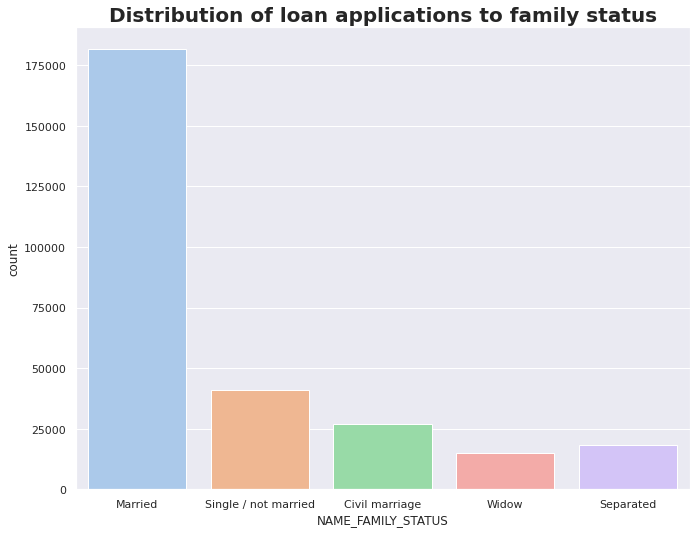

In [ ]:
df_family_status = df_train[df_train["TARGET"] == 0]["NAME_FAMILY_STATUS"]
df_family_status_labels = df_family_status.unique()
df_family_status_labels.sort()
print(df_family_status.value_counts())
plt.figure(figsize=(11, 8.5))
sns.countplot(df_family_status, palette="pastel")
_ = plt.title("Distribution of loan applications to family status", fontweight="bold", fontsize="20")

<div style="border: 1px solid #3498DB; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: #a1c9f4; color: darkblue;">
    <h4>Inference</h4>
    The majority of clients who are married have repaid the loan.
</div>

## What is the distribution of loan applications to family status by gender?

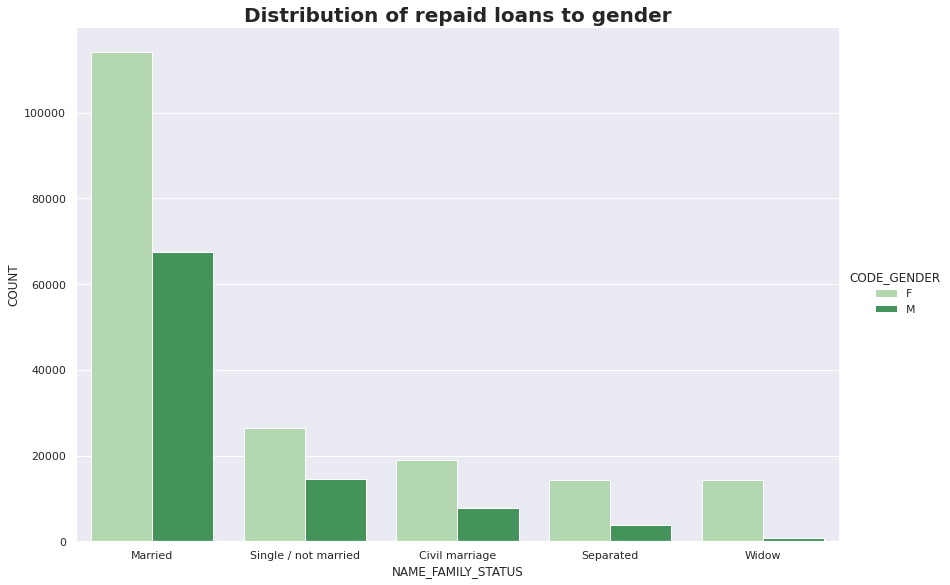

In [ ]:
df_family_status_gender = df_train[df_train["TARGET"] == 0][["NAME_FAMILY_STATUS", "CODE_GENDER"]]
df_family_status_gender = df_family_status_gender.value_counts()
df_family_status_gender = pd.DataFrame(data=[(x[0], x[1], df_family_status_gender[x]) for x in df_family_status_gender.index], columns=["NAME_FAMILY_STATUS", "CODE_GENDER", "COUNT"])
sns.catplot(x="NAME_FAMILY_STATUS", y="COUNT", hue="CODE_GENDER", data=df_family_status_gender, kind="bar", palette="Greens", height=8, aspect=1.5)
_ = plt.title("Distribution of repaid loans to gender", fontweight="bold", fontsize="20")

<div style="border: 1px solid darkgreen; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: #b3d7ae; color: darkgreen;">
    <h4>Inference</h4>
    Under each family status, the females have the highest repayment percentage.
</div>

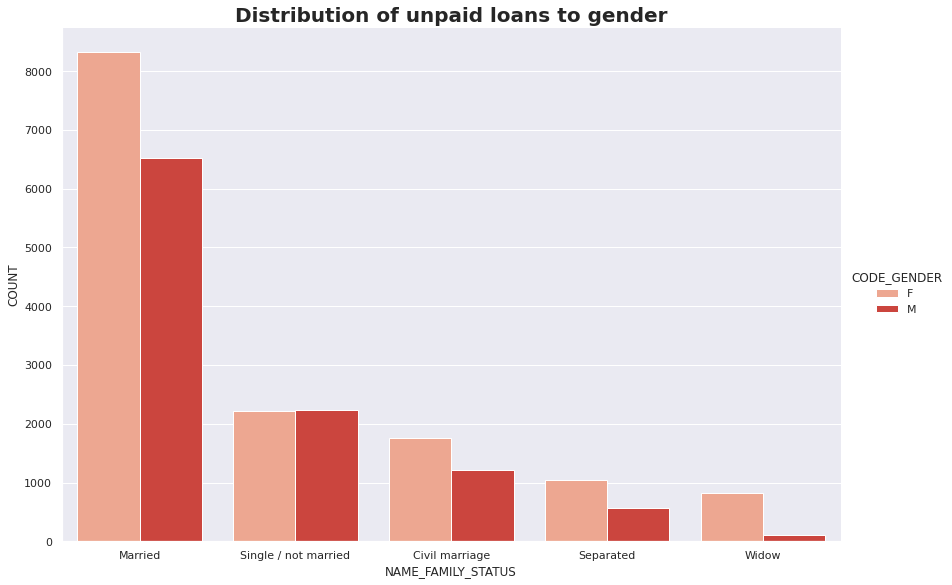

In [ ]:
df_family_status_gender = df_train[df_train["TARGET"] == 1][["NAME_FAMILY_STATUS", "CODE_GENDER"]]
df_family_status_gender = df_family_status_gender.value_counts()
df_family_status_gender = pd.DataFrame(data=[(x[0], x[1], df_family_status_gender[x]) for x in df_family_status_gender.index], columns=["NAME_FAMILY_STATUS", "CODE_GENDER", "COUNT"])
sns.catplot(x="NAME_FAMILY_STATUS", y="COUNT", hue="CODE_GENDER", data=df_family_status_gender, kind="bar", palette="Reds", height=8, aspect=1.5)
_ = plt.title("Distribution of unpaid loans to gender", fontweight="bold", fontsize="20")

<div style="border: 1px solid #cb453e; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: #ffe0dc; color: #cb453e;">
    <h4>Inference</h4>
    Under each family status, the females have the highest repayment percentage.
</div>

## How many percent of borrowers who haven't repaid, own cars?

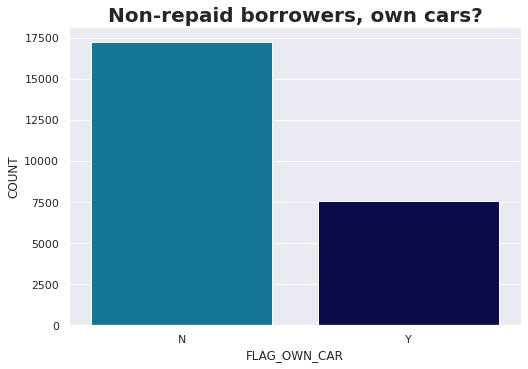

In [ ]:
af = df_train[df_train["TARGET"] == 1]["FLAG_OWN_CAR"].value_counts()
af = pd.DataFrame(data=[(x[0], af[x]) for x in af.index], columns=["FLAG_OWN_CAR", "COUNT"])
sns.catplot(x="FLAG_OWN_CAR", y="COUNT", data=af, kind="bar", palette="ocean_r", height=5, aspect=1.5)
_ = plt.title("Non-repaid borrowers, own cars?", fontweight="bold", fontsize="20")

<div style="border: 1px solid black; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: white; color: black;">
    <h4>Inference</h4>
    Out of 25000 people who have not repaid the loan, 70% of people do not own a car!
</div>

## Do educated borrowers pay the loans?

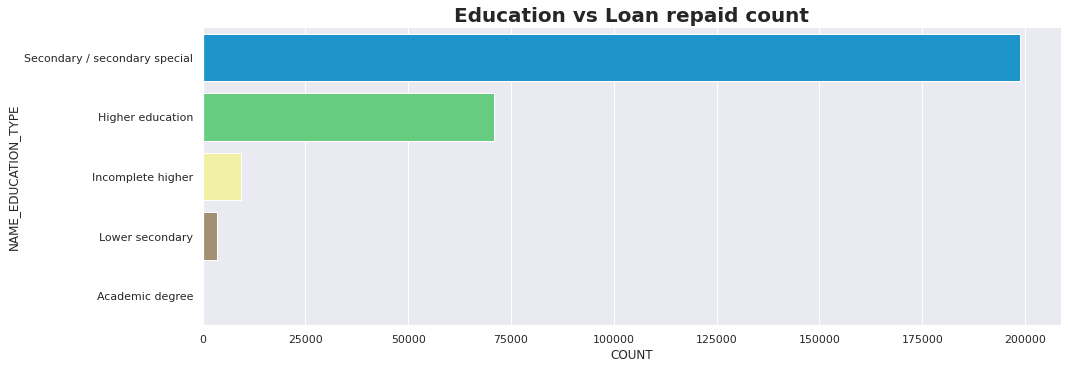

In [ ]:
af = df_train[df_train["TARGET"] == 0]["NAME_EDUCATION_TYPE"].value_counts()
af = pd.DataFrame(data=[(x, af[x]) for x in af.index], columns=["NAME_EDUCATION_TYPE", "COUNT"])
sns.catplot(y="NAME_EDUCATION_TYPE", x="COUNT", data=af, kind="bar", palette="terrain", height=5, aspect=3)
_ = plt.title("Education vs Loan repaid count", fontweight="bold", fontsize="20")

<div style="border: 1px solid black; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: white; color: black;">
    <h4>Inference</h4>
    Clients with a secondary/special degree, are more likely to repay the loans compared to the others.
</div>

## Where do clients having unpaid loans live?

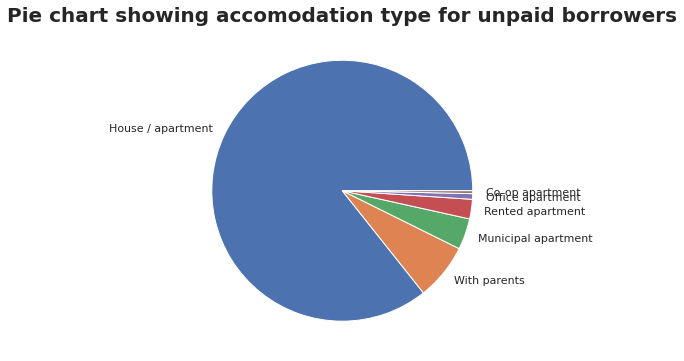

In [ ]:
af = df_train[df_train["TARGET"] == 1]["NAME_HOUSING_TYPE"].value_counts()
plt.pie(af, labels=af.index)
_ = plt.title("Pie chart showing accomodation type for unpaid borrowers", fontweight="bold", fontsize="20")

<div style="border: 1px solid black; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: white; color: black;">
    <h4>Inference</h4>
    Although the loans are not repaid, maximun number of people still live in their own houses/apartments.
</div>

## Finding the income type relation to loan target code

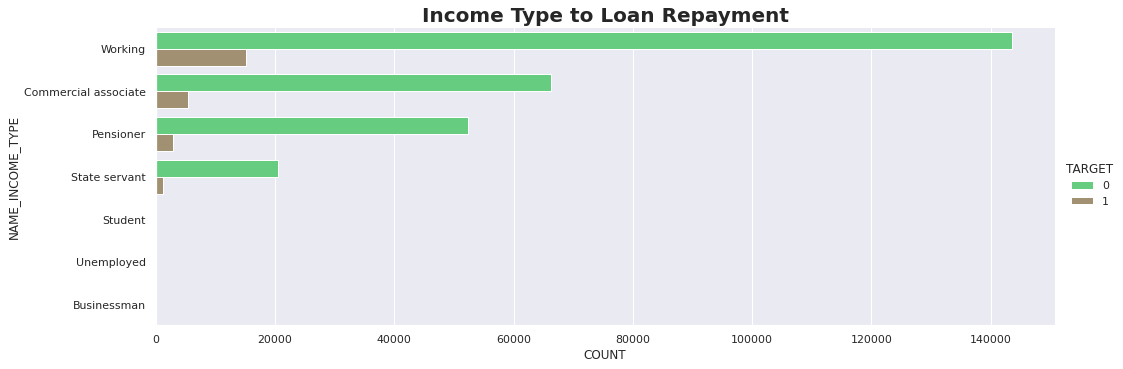

In [ ]:
af = df_train[["NAME_INCOME_TYPE", "TARGET"]].value_counts()
af = pd.DataFrame(data=[(x[0], x[1], af[x]) for x in af.index], columns=["NAME_INCOME_TYPE", "TARGET", "COUNT"])
sns.catplot(y="NAME_INCOME_TYPE", x="COUNT", hue="TARGET", data=af, kind="bar", palette="terrain", height=5, aspect=3)
_ = plt.title("Income Type to Loan Repayment", fontweight="bold", fontsize="20")

<div style="border: 1px solid #afffdf; padding: 8px; padding-left: 16px; padding-bottom: 16px; background: #afffdf; color: black;">
    <h4>Inference</h4>
    According to bar plot above borrowers with working income type have repaid the most loans.
</div>

## Columns

In [ ]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
columns_to_dummy = [col for col in df_train.columns if df_train.dtypes[col] == np.dtype("O")]
df_temp_dummies = pd.get_dummies(df_train, columns=columns_to_dummy)
df_temp_dummies

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,0,0,0,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,0,0,0,0


### Remove nulls

Find the columns with non-numerical values and still having null values and encode it

In [ ]:
columns_nullcount_types = pd.DataFrame(data=zip(df_temp_dummies.columns, df_temp_dummies.isnull().sum(), df_temp_dummies.dtypes),
                                       columns=["Column", "NullCount", "Type"])
columns_nullcount = columns_nullcount_types[columns_nullcount_types["NullCount"] > 0]
columns_nullcount

,Column,NullCount,Type
5,AMT_ANNUITY,12,float64
6,AMT_GOODS_PRICE,276,float64
20,EXT_SOURCE_2,660,float64
21,EXT_SOURCE_3,60959,float64
22,OBS_30_CNT_SOCIAL_CIRCLE,1021,float64
23,OBS_60_CNT_SOCIAL_CIRCLE,1021,float64
24,DAYS_LAST_PHONE_CHANGE,1,float64
26,AMT_REQ_CREDIT_BUREAU_MON,41514,float64
27,AMT_REQ_CREDIT_BUREAU_QRT,41514,float64
28,AMT_REQ_CREDIT_BUREAU_YEAR,41514,float64


~~Converting categorical data into numerical forms for all such columns to convert~~

In [ ]:
# columns_to_convert = ["NAME_TYPE_SUITE"]

# for column in columns_to_convert:
#     unique_name_type_suite = [x for x in df_train[column].unique() if str(x) != 'nan']
#     df_train[column].replace(unique_name_type_suite, list(range(len(unique_name_type_suite))), inplace=True)

# df_train["NAME_TYPE_SUITE"].unique()

In [ ]:
df_train_interpolated = df_temp_dummies.interpolate(method='cubic', limit_direction="forward")
df_train_interpolated

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,0,0,0,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train_interpolated.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,307500.000000,307500.000000,307500.000000,3.075000e+05,3.075000e+05,307500.000000,3.075000e+05,307500.000000,307500.000000,307500.000000,...,307500.000000,307500.000000,307500.000000,307500.000000,307500.000000,307500.000000,307500.00000,307500.000000,307500.000000,307500.000000
mean,278181.087798,0.080725,0.417034,1.687971e+05,5.990259e+05,27108.650858,5.383484e+05,0.020868,-16037.069246,63817.429333,...,0.000208,0.000159,0.002052,0.025467,0.000654,0.007164,0.00386,0.017554,0.004315,0.180078
std,102789.822017,0.272413,0.722108,2.371263e+05,4.024936e+05,14493.662612,3.694725e+05,0.013831,4363.988872,141277.730537,...,0.014425,0.012622,0.045253,0.157538,0.025558,0.084338,0.06201,0.131325,0.065550,0.384253
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1407.291066,-5.349644e+05,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,189146.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,278202.500000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,367143.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
df_train_interpolated.isnull().sum()

SK_ID_CURR                             0
TARGET                                 0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT                             0
                                      ..
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
ORGANIZATION_TYPE_XNA                  0
Length: 150, dtype: int64

In [ ]:
dumm_corr = df_train_interpolated.corr().abs()
dumm_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
SK_ID_CURR,1.000000,0.002137,0.001140,0.001808,0.000346,0.000438,0.000267,0.000864,0.001514,0.001363,...,0.002342,0.000148,0.000408,0.003102,0.000891,0.002597,0.000670,0.002658,0.000496,0.001365
TARGET,0.002137,1.000000,0.019143,0.003970,0.030390,0.012817,0.039610,0.037223,0.078236,0.044927,...,0.002620,0.000904,0.005787,0.008172,0.003375,0.000968,0.017553,0.005931,0.007671,0.045983
CNT_CHILDREN,0.001140,0.019143,1.000000,0.012897,0.002139,0.021378,0.001845,0.025573,0.330937,0.239816,...,0.002594,0.001939,0.001179,0.018902,0.001264,0.020947,0.004211,0.011963,0.000852,0.240720
AMT_INCOME_TOTAL,0.001808,0.003970,0.012897,1.000000,0.156873,0.191644,0.159536,0.074792,0.027264,0.064222,...,0.001360,0.000687,0.002131,0.000840,0.002208,0.002397,0.001778,0.012324,0.005098,0.064037
AMT_CREDIT,0.000346,0.030390,0.002139,0.156873,1.000000,0.770101,0.986120,0.099745,0.055435,0.066839,...,0.000726,0.000731,0.003274,0.002053,0.002425,0.000053,0.009990,0.012154,0.017552,0.065595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORGANIZATION_TYPE_Transport: type 2,0.002597,0.000968,0.020947,0.002397,0.000053,0.001084,0.000825,0.010271,0.031885,0.040714,...,0.001226,0.001072,0.003852,0.013732,0.002173,1.000000,0.005288,0.011355,0.005592,0.039810
ORGANIZATION_TYPE_Transport: type 3,0.000670,0.017553,0.004211,0.001778,0.009990,0.001484,0.010514,0.006841,0.009726,0.028737,...,0.000898,0.000786,0.002823,0.010063,0.001592,0.005288,1.000000,0.008321,0.004098,0.029173
ORGANIZATION_TYPE_Transport: type 4,0.002658,0.005931,0.011963,0.012324,0.012154,0.021421,0.011763,0.013767,0.037417,0.062476,...,0.001929,0.001688,0.006061,0.021609,0.003419,0.011355,0.008321,1.000000,0.008800,0.062645
ORGANIZATION_TYPE_University,0.000496,0.007671,0.000852,0.005098,0.017552,0.015298,0.017220,0.007566,0.002367,0.031440,...,0.000950,0.000831,0.002985,0.010642,0.001684,0.005592,0.004098,0.008800,1.000000,0.030853


In [ ]:
dumm_corr_target = dumm_corr["TARGET"]
dumm_corr_target_top_16 = dumm_corr_target.sort_values(ascending=False).head(16).index
dumm_corr_target_top_16

Index(['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_M', 'CODE_GENDER_F',
       'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA',
       'FLAG_EMP_PHONE'],
      dtype='object')

## ~~Top 10 Feature Correlations Heatmap~~
~~Get the top 11 features having highest correlation with `TARGET` (including `TARGET` itself) and plot the heatmap to find the linear relationships between these variables.~~

In [ ]:
# def cartesian_product(*arrays):
#     la = len(arrays)
#     dtype = np.result_type(*arrays)
#     arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
#     for i, a in enumerate(np.ix_(*arrays)):
#         arr[...,i] = a
#     return arr.reshape(-1, la)

# dumm_corr_target_top_16_pairs = cartesian_product(dumm_corr_target_top_16, dumm_corr_target_top_16)
# dumm_corr_target_top_16_matrix = np.zeros((len(dumm_corr_target_top_16), len(dumm_corr_target_top_16)))
# for i in range(len(dumm_corr_target_top_16)):
#     for j in range(len(dumm_corr_target_top_16)):
#         r = dumm_corr_target_top_16[i]
#         c = dumm_corr_target_top_16[j]
#         dumm_corr_target_top_16_matrix[i][j] = dumm_corr[r][c]

In [ ]:
# triangle_mask = np.zeros_like(dumm_corr_target_top_16_matrix, dtype=np.bool_)
# triangle_mask[np.triu_indices_from(triangle_mask)] = True
# func, axes = plt.subplots(figsize=(10, 10))
# sns.heatmap(dumm_corr_target_top_16_matrix, mask=triangle_mask, cmap="vlag", square=True, linewidths=1.0, ax=axes,
#             xticklabels=dumm_corr_target_top_16, yticklabels=dumm_corr_target_top_16)
# _ = plt.title("Top 15 feature correlations with TARGET", fontweight="bold", fontsize="20")

## Plot each highly correlated feature against `TARGET`

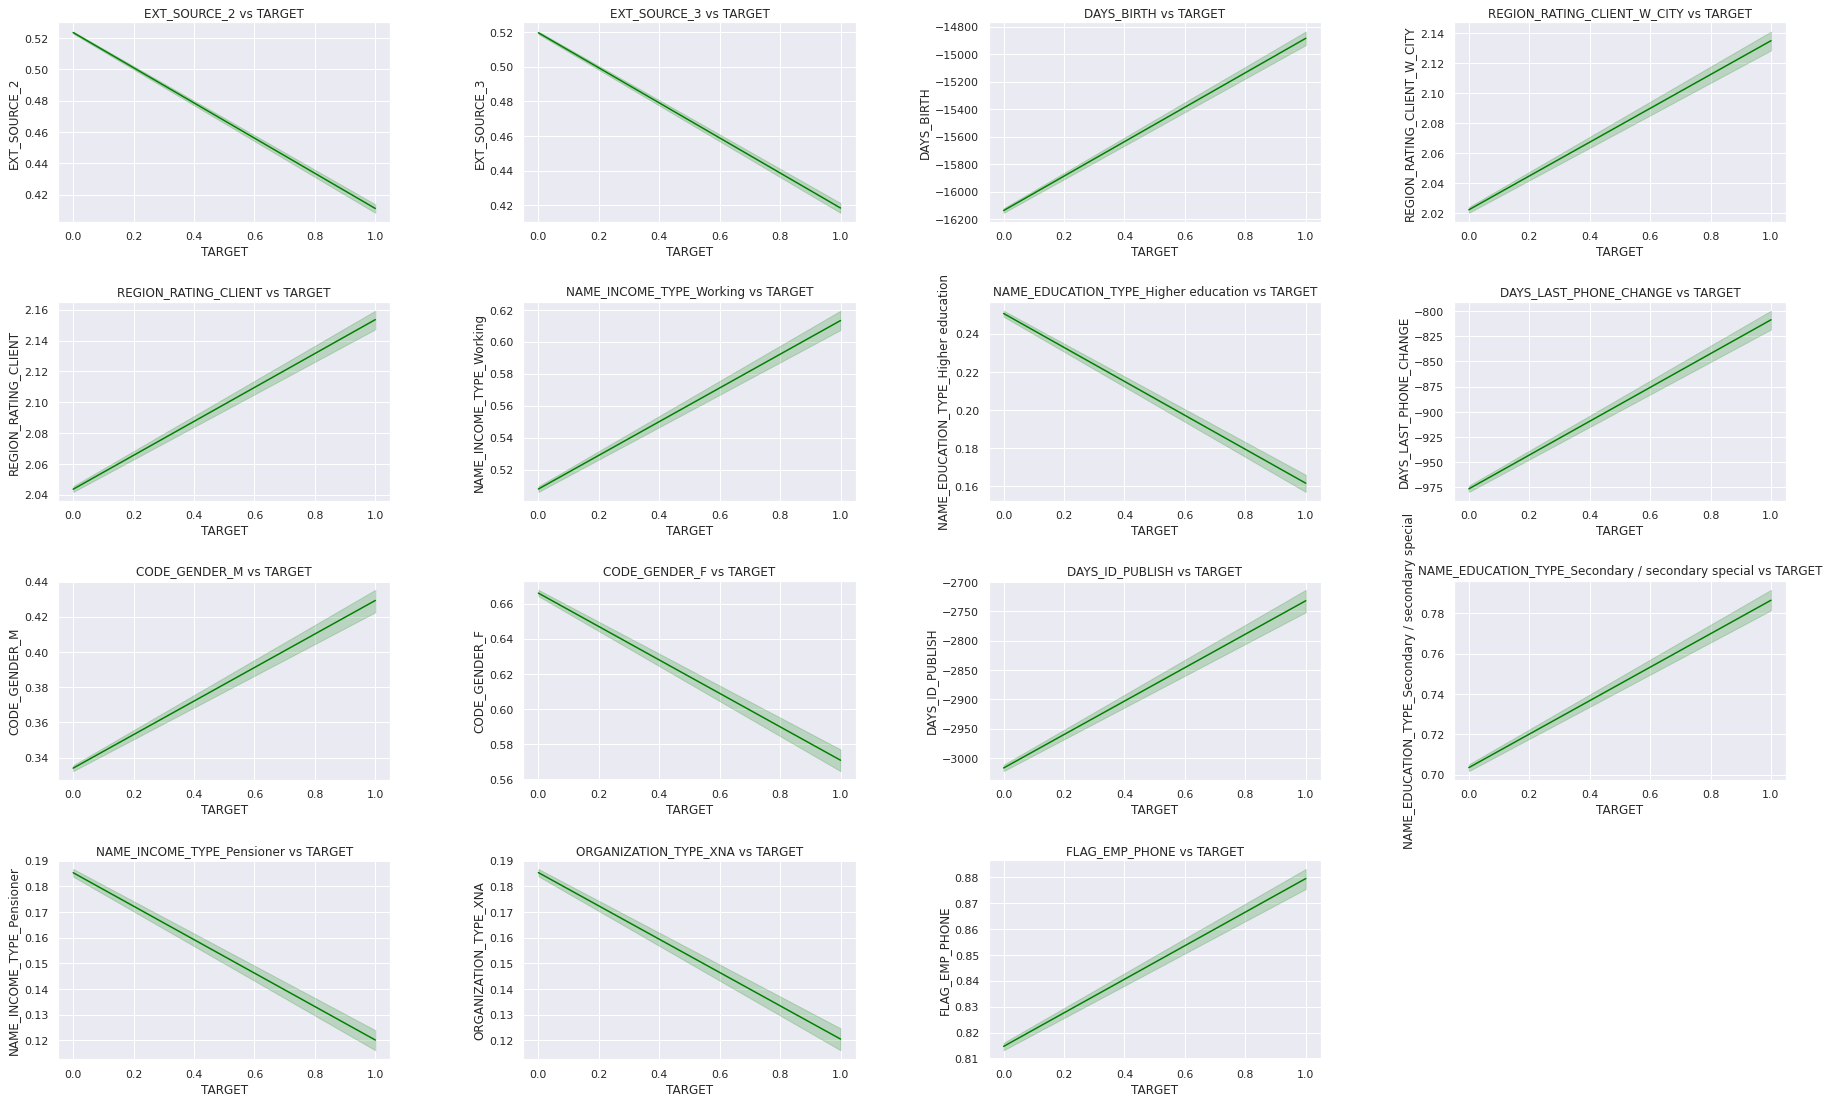

In [ ]:
func, ax = plt.subplots(4, 4, figsize=(30, 18), facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(1, len(dumm_corr_target_top_16)):
    feature = dumm_corr_target_top_16[i]
    curr_ax = ax[(i - 1) // 4][(i - 1) % 4]
    sns.lineplot(x='TARGET', y=feature, data=df_train_interpolated, color="green", ax=curr_ax)
    curr_ax.title.set_text(feature + " vs TARGET")
ax[-1][-1].set_visible(False)

# Modeling Pipelines

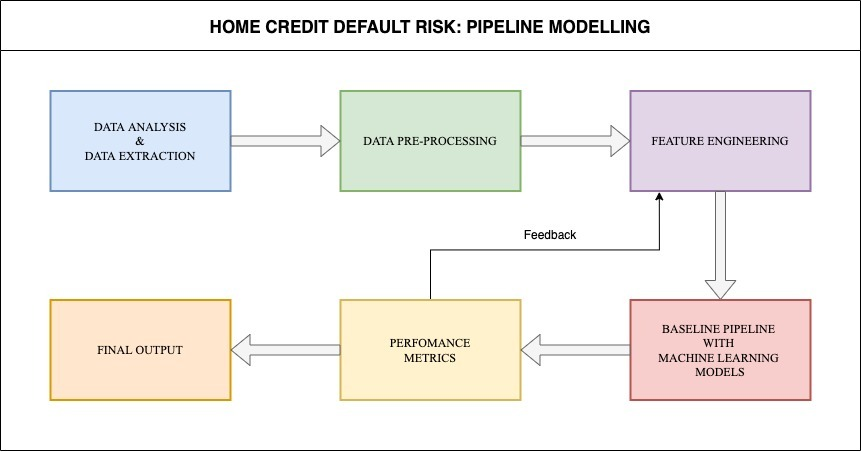

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_train_interpolated_X = df_train_interpolated.copy()
df_train_interpolated_X.drop(columns = ['TARGET'], inplace=True)

In [ ]:
# Create a basic numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Column transform pipeline
data_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, df_train_interpolated_X.columns)
], n_jobs = -1)

# Run the transform
data_transformed = data_pipeline.fit_transform(df_train_interpolated_X)

Make the transformed data into a DataFrame

In [ ]:
df_transformed = pd.DataFrame(data_transformed,  columns=df_train_interpolated_X.columns)

Check the DataFrame

In [ ]:
df_transformed

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,-8456.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307496,456252.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,-4388.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307497,456253.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,-6737.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307498,456254.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,-2562.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_transformed.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,307500.000000,307500.000000,3.075000e+05,3.075000e+05,307500.000000,3.075000e+05,307500.000000,307500.000000,307500.000000,307500.000000,...,307500.000000,307500.000000,307500.000000,307500.000000,307500.000000,307500.000000,307500.00000,307500.000000,307500.000000,307500.000000
mean,278181.087798,0.417034,1.687971e+05,5.990259e+05,27108.650858,5.383484e+05,0.020868,-16037.069246,63817.429333,-4986.152449,...,0.000208,0.000159,0.002052,0.025467,0.000654,0.007164,0.00386,0.017554,0.004315,0.180078
std,102789.822017,0.722108,2.371263e+05,4.024936e+05,14493.662612,3.694725e+05,0.013831,4363.988872,141277.730537,3522.883278,...,0.014425,0.012622,0.045253,0.157538,0.025558,0.084338,0.06201,0.131325,0.065550,0.384253
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1407.291066,-5.349644e+05,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,189146.750000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,278202.500000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,367143.250000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Results of Pipeline

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
model_results = []
X = df_transformed.values
y = df_train_interpolated["TARGET"].values
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (307500, 149)
Shape of y (307500,)


In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42)

### LogisticRegression

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])
pipe.fit(X_train, y_train)
print("Accuracy score (training):", str(pipe.score(X_train, y_train)))

Accuracy score (training): 0.9195924119241192


In [ ]:
y_pred = pipe.predict(X_validation)
print("Accuracy score (validation):", str(accuracy_score(y_validation, y_pred)))
print("Log loss:", log_loss(y_validation, y_pred))
print("Confusion Matrix:", "\n", confusion_matrix(y_validation, y_pred))
print("ROC_AUC:", roc_auc_score(y_validation, pipe.predict_proba(X_validation)[:, 1]))

Accuracy score (validation): 0.9179186991869919
Log loss: 2.8349881942447235
Confusion Matrix: 
 [[70530    48]
 [ 6262    35]]
ROC_AUC: 0.7257233296392955


In [ ]:
model_results.append(["Logistic Regression", pipe.score(X_train, y_train), accuracy_score(y_validation, y_pred)])

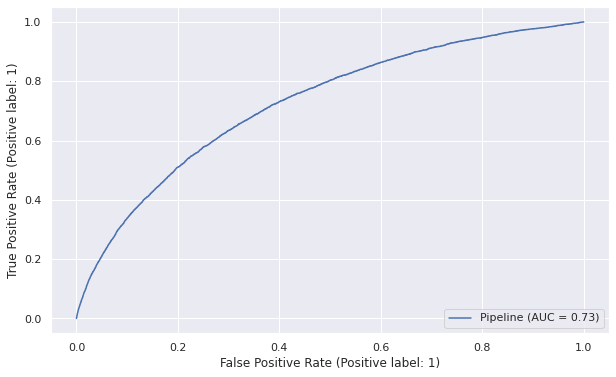

In [ ]:
func, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics.plot_roc_curve(pipe, X_validation, y_validation, ax=ax)

### Naive Bayes (Gaussian)

In [ ]:
pipe_naive_bayes = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

pipe_naive_bayes.fit(X_train, y_train)
print("Accuracy score (training):", str(pipe_naive_bayes.score(X_train, y_train)))

Accuracy score (training): 0.13572249322493224


In [ ]:
y_pred = pipe_naive_bayes.predict(X_validation)
print("Accuracy score (validation):", str(accuracy_score(y_validation, y_pred)))
print("Log loss:", log_loss(y_validation, y_pred))
print("Confusion Matrix:", "\n", confusion_matrix(y_validation, y_pred))
print("ROC_AUC:", roc_auc_score(y_validation, pipe_naive_bayes.predict_proba(X_validation)[:, 1]))

Accuracy score (validation): 0.13668943089430893
Log loss: 29.81837815666981
Confusion Matrix: 
 [[ 4485 66093]
 [  274  6023]]
ROC_AUC: 0.6180994159827307


In [ ]:
model_results.append(["Naive Bayes (Gaussian)", pipe_naive_bayes.score(X_train, y_train), accuracy_score(y_validation, y_pred)])

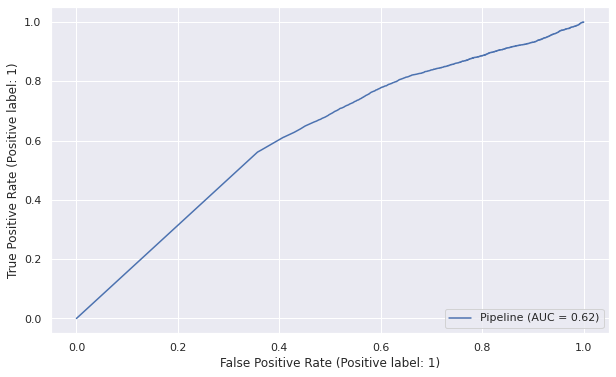

In [ ]:
func, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics.plot_roc_curve(pipe_naive_bayes, X_validation, y_validation, ax=ax)

### Random Forest

In [ ]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipe_rf.fit(X_train, y_train)
print("Accuracy score (training):", str(pipe_rf.score(X_train, y_train)))

Accuracy score (training): 0.9999392953929539


In [ ]:
y_pred = pipe_rf.predict(X_validation)
print("Accuracy score (validation):", str(accuracy_score(y_validation, y_pred)))
print("Log loss:", log_loss(y_validation, y_pred))
print("Confusion Matrix:", "\n", confusion_matrix(y_validation, y_pred))
print("ROC_AUC:", roc_auc_score(y_validation, pipe_rf.predict_proba(X_validation)[:, 1]))

Accuracy score (validation): 0.9180878048780488
Log loss: 2.829147012135902
Confusion Matrix: 
 [[70576     2]
 [ 6295     2]]
ROC_AUC: 0.7055574874697946


In [ ]:
model_results.append(["Random Forest", pipe_rf.score(X_train, y_train), accuracy_score(y_validation, y_pred)])

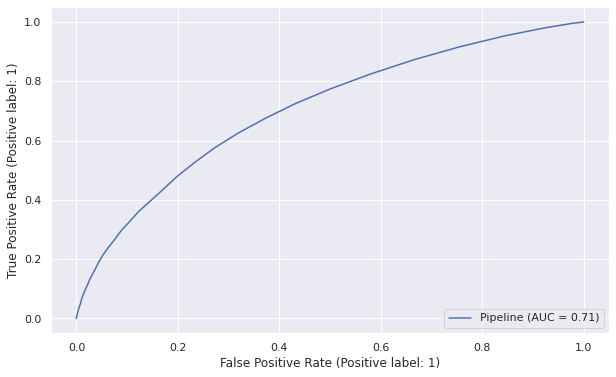

In [ ]:
func, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics.plot_roc_curve(pipe_rf, X_validation, y_validation, ax=ax)

Build data frame of model results

In [ ]:
pd.DataFrame(model_results, columns = ["Model Name", "Training Accuracy", "Validation Accuracy"])

,Model Name,Training Accuracy,Validation Accuracy
0,Logistic Regression,0.919592,0.917919
1,Naive Bayes (Gaussian),0.135722,0.136689
2,Random Forest,0.999939,0.918088


- From the above three pipeline tests we can see that the highest accuracy is obatined by using the Random Forest model, with accuracy of 91.826%. We also get the Logistic Regression model with accuracy of 91.802%. Both these models seem to be good models to start with.
- The ROC value for Logistic Regression and Random Forest is 0.72 and 0.71 which show a significant amount of True Positive values and indicate a good fit. The Naive Bayes is however not so great with only 0.62, so we cannot move forward with Naive Bayes on this ground as well.
- We need to check if Logistic Regression or Random Forest is a better model and whether either of them are overfitting.

Now we cleanup the memory a little bit to reclaim what is already used up, this is to optimize the colab runtime we are using.

In [ ]:
del missing_counts_percent_top_20
del above_75_zeroes
del above_35_nulls
del af
del df_target_f
del df_target_m
del df_family_status
del df_family_status_gender
del df_temp_dummies
del columns_nullcount_types
del df_train_interpolated_X
del df_train_interpolated
del ax
del data_transformed
del X_train
del X_validation
del y_train
del y_validation

In [ ]:
import gc
gc.collect()

7075

# Merge Datasets

In [ ]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [ ]:
datasets['installments_payments'] = datasets['installments_payments'].select_dtypes(exclude='object')
datasets['POS_CASH_balance'] = datasets['POS_CASH_balance'].select_dtypes(exclude='object')
datasets['previous_application'] = datasets['previous_application'].select_dtypes(exclude='object')
datasets['credit_card_balance'] = datasets['credit_card_balance'].select_dtypes(exclude='object')

In [ ]:
datasets['installments_payments'] = datasets['installments_payments'][datasets['installments_payments']["SK_ID_CURR"].isin(df_train["SK_ID_CURR"])]
datasets['POS_CASH_balance'] = datasets['POS_CASH_balance'][datasets['POS_CASH_balance']["SK_ID_CURR"].isin(df_train["SK_ID_CURR"])]
datasets['previous_application'] = datasets['previous_application'][datasets['previous_application']["SK_ID_CURR"].isin(df_train["SK_ID_CURR"])]
datasets['credit_card_balance'] = datasets['credit_card_balance'][datasets['credit_card_balance']["SK_ID_CURR"].isin(df_train["SK_ID_CURR"])]

In [ ]:
datasets['installments_payments'] = datasets['installments_payments'].groupby("SK_ID_CURR", as_index=False).median()
datasets['POS_CASH_balance'] = datasets['POS_CASH_balance'].groupby("SK_ID_CURR", as_index=False).median()
datasets['previous_application'] = datasets['previous_application'].groupby("SK_ID_CURR", as_index=False).median()
datasets['credit_card_balance'] = datasets['credit_card_balance'].groupby("SK_ID_CURR", as_index=False).median()

In [ ]:
display(datasets['installments_payments'].columns)
display(datasets['POS_CASH_balance'].columns)
display(datasets['previous_application'].columns)
display(datasets['credit_card_balance'].columns)
display(datasets['bureau_balance'].columns)
display(datasets['bureau'].columns)

Index(['SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

Index(['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

Index(['SK_ID_CURR', 'SK_ID_PREV', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Index(['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307500 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307500 non-null  int64  
 1   TARGET                       307500 non-null  int64  
 2   NAME_CONTRACT_TYPE           307500 non-null  object 
 3   CODE_GENDER                  307500 non-null  object 
 4   FLAG_OWN_CAR                 307500 non-null  object 
 5   FLAG_OWN_REALTY              307500 non-null  object 
 6   CNT_CHILDREN                 307500 non-null  int64  
 7   AMT_INCOME_TOTAL             307500 non-null  float64
 8   AMT_CREDIT                   307500 non-null  float64
 9   AMT_ANNUITY                  307488 non-null  float64
 10  AMT_GOODS_PRICE              307224 non-null  float64
 11  NAME_TYPE_SUITE              306210 non-null  object 
 12  NAME_INCOME_TYPE             307500 non-null  object 
 13 

In [ ]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 41]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [     86,904, 22]
dataset installments_payments   : [    291,637, 8]
dataset previous_application    : [    291,051, 21]
dataset POS_CASH_balance        : [    289,438, 7]


Prepare `df_bureau_balance` because we do not have any `SK_ID_CURR` in that dataset and so we need to merge it with dataset `bureau`.

In [ ]:
# Merge df_bureau and df_bureau_balance
datasets['bureau_balance'] = pd.merge(left=datasets['bureau'], right=datasets['bureau_balance'], how='left', left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU')

In [ ]:
datasets['bureau_balance'].columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [ ]:
# Remove data in bureau balance, with SK_ID_CURR not present in df_train
del datasets['bureau'] # Delete bureau as no longer needed
datasets['bureau_balance'] = datasets['bureau_balance'].drop_duplicates()

In [ ]:
# Group SK_ID_CURR
datasets['bureau_balance'] = datasets['bureau_balance'].groupby(['SK_ID_CURR','SK_ID_BUREAU']).min()

In [ ]:
datasets['bureau_balance'] = datasets['bureau_balance'][['DAYS_CREDIT','DAYS_ENDDATE_FACT','AMT_CREDIT_SUM','DAYS_CREDIT_UPDATE','MONTHS_BALANCE']]
datasets['bureau_balance'] = datasets['bureau_balance'].reset_index()
datasets['bureau_balance'] = datasets['bureau_balance'].groupby('SK_ID_CURR').median()
datasets['bureau_balance'] = datasets['bureau_balance'].reset_index()

In [ ]:
datasets['bureau_balance'] = datasets['bureau_balance'].select_dtypes(exclude="object")

In [ ]:
datasets['bureau_balance']

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE
0,100001,5896633.0,-857.0,-715.0,168345.00,-155.0,-28.0
1,100002,6158905.5,-1042.5,-939.0,54130.50,-402.5,-34.0
2,100003,5885878.5,-1205.5,-621.0,92576.25,-545.0,NaN
3,100004,6829133.5,-867.0,-532.5,94518.90,-532.0,NaN
4,100005,6735201.0,-137.0,-123.0,58500.00,-31.0,-4.0
...,...,...,...,...,...,...,...
305806,456249,5371700.0,-1680.0,-1279.0,248692.50,-909.0,NaN
305807,456250,6817237.0,-824.0,-760.0,483349.50,-31.0,-27.0
305808,456253,6098498.5,-919.0,-794.0,675000.00,-153.5,-30.0
305809,456254,6669849.0,-1104.0,-859.0,45000.00,-401.0,-36.0


In [ ]:
# Cache the current grouped dataset as it takes time
datasets['installments_payments'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_installments_payments_grouped.csv")
datasets['POS_CASH_balance'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_POS_CASH_balance_grouped.csv")
datasets['previous_application'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_previous_application_grouped.csv")
datasets['credit_card_balance'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_credit_card_balance_grouped.csv")
datasets['bureau_balance'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_bureau_balance_grouped.csv")

In [ ]:
# # ONLY RUN if dynamically loading from cache
# # Done to avoid computation times
# datasets['installments_payments'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_installments_payments_grouped.csv")
# datasets['POS_CASH_balance'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_POS_CASH_balance_grouped.csv")
# datasets['previous_application'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_previous_application_grouped.csv")
# datasets['credit_card_balance'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_credit_card_balance_grouped.csv")
# datasets['bureau_balance'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_bureau_balance_grouped.csv")

In [ ]:
pd.DataFrame(data=[["installments_payments", len(datasets['installments_payments'])],
                   ["POS_CASH_balance", len(datasets['POS_CASH_balance'])],
                   ["previous_application", len(datasets['previous_application'])],
                   ["credit_card_balance", len(datasets['credit_card_balance'])],
                   ["bureau_balance", len(datasets['bureau_balance'])]], columns=["Table", "Rows"])

,Table,Rows
0,installments_payments,291643
1,POS_CASH_balance,289444
2,previous_application,291057
3,credit_card_balance,86905
4,bureau_balance,305811


In [ ]:
datasets["installments_payments"].columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

Measure memory resources

In [ ]:
import sys

def print_memory_usage():
    to_measure = [x for x in (list(locals().keys()) + list(globals().keys())) if x.startswith("df_")]
    measured = [[x, sys.getsizeof(eval(x)) // 1024 // 1024] for x in to_measure]
    try:
        measured += [["dataset[" + k + "]", sys.getsizeof(datasets[k]) // 1024 // 1024] for k in datasets]
    except Exception as e:
        pass
    memory_usage = pd.DataFrame(data=measured,
                                columns=["DataFrame", "Size"]).sort_values("Size")
    display(memory_usage)
    print("Total:", memory_usage["Size"].sum())

The above shows that we might have much more data in installments_payments table

In [ ]:
# Measure memory footprint
print_memory_usage()

,DataFrame,Size
8,dataset[credit_card_balance],15
11,dataset[POS_CASH_balance],17
7,dataset[bureau_balance],18
9,dataset[installments_payments],20
10,dataset[previous_application],48
3,df_test,84
5,dataset[application_test],84
1,df_merged_dummies,256
0,df_merged,452
6,dataset[bureau],512


Total: 2578


# Filter out invalid data values compared to test dataset

In [ ]:
df_train = drop_non_existing_in_test(df_train, df_test)
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Merge all tables

In [ ]:
key = "SK_ID_CURR"

In [ ]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
df_merged = pd.merge(left=df_train, right=datasets['previous_application'], how='left', left_on=key, right_on=key)
df_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,-828.0,200.0,12.0,365243.0,-797.0,-647.0,-647.0,-639.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,-815.0,30.0,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,-181.0,-1.0,15.0,365243.0,-216.0,654.0,182546.0,182550.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,-986.5,28.5,15.0,365243.0,-1076.0,-746.0,-746.0,-739.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,-273.0,30.0,8.0,365243.0,-210.0,0.0,-30.0,-25.0,0.0
307496,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,-2497.0,190.0,6.0,365243.0,-2466.0,-2316.0,-2316.0,-2311.0,1.0
307497,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,-2380.0,22.0,5.0,365243.0,-2339.0,-2219.0,-2219.0,-2212.5,0.5
307498,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,-299.5,1578.0,15.0,365243.0,-269.0,151.0,365243.0,365243.0,0.5


In [ ]:
df_merged = pd.merge(left=df_merged, right=datasets['POS_CASH_balance'], how='left', left_on=key, right_on=key)
df_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Unnamed: 0_y,SK_ID_PREV_y,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-25.0,-17.0,0.0,0.0,1038818.0,-10.0,24.0,15.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-647.0,-639.0,1.0,1.0,2396755.0,-26.5,12.0,6.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-724.0,-714.0,0.0,2.0,1564014.0,-25.5,4.0,2.5,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,182546.0,182550.0,0.0,3.0,2190416.0,-8.0,12.0,8.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-746.0,-739.0,1.0,4.0,2001242.0,-27.5,12.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-30.0,-25.0,0.0,289439.0,2248017.0,-5.0,8.0,4.5,0.0,0.0
307496,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,-2316.0,-2311.0,1.0,289440.0,1503599.0,-79.0,6.0,3.0,0.0,0.0
307497,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-2219.0,-2212.5,0.5,289441.0,1686207.0,-90.0,6.0,2.0,0.0,0.0
307498,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,365243.0,365243.0,0.5,289442.0,1792910.0,-5.5,14.0,10.5,0.0,0.0


In [ ]:
df_merged = pd.merge(left=df_merged, right=datasets['credit_card_balance'], how='left', left_on=key, right_on=key)
df_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307496,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307497,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307498,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merged = pd.merge(left=df_merged, right=datasets['installments_payments'], how='left', left_on=key, right_on=key)
df_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_DPD_y,SK_DPD_DEF_y,Unnamed: 0_y,SK_ID_PREV_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,0.0,1038818.0,1.0,10.0,-295.0,-312.0,9251.775,9251.775
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,1.0,2396755.0,1.0,5.0,-797.0,-806.0,64275.615,64275.615
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,2.0,1564014.0,1.0,2.0,-754.0,-763.0,5357.250,5357.250
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,3.0,2190416.0,1.0,4.0,-206.0,-211.0,29027.520,29027.520
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,4.0,2001242.0,1.0,7.0,-851.0,-852.5,16037.640,16037.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,291638.0,2248017.0,1.0,4.0,-120.0,-166.0,6605.910,6605.910
307496,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,291639.0,1503599.0,1.0,3.5,-2391.0,-2392.0,10074.465,10074.465
307497,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,NaN,291640.0,1686207.0,1.0,3.5,-2737.0,-2743.0,3973.095,3973.095
307498,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,NaN,291641.0,1792910.0,1.0,5.0,-141.0,-167.0,2296.440,2296.440


In [ ]:
df_merged = pd.merge(left=df_merged, right=datasets['bureau_balance'], how='left', left_on=key, right_on=key)
df_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Unnamed: 0,SK_ID_BUREAU,DAYS_CREDIT,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-312.0,9251.775,9251.775,1.0,6158905.5,-1042.5,-939.0,54130.50,-402.5,-34.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-806.0,64275.615,64275.615,2.0,5885878.5,-1205.5,-621.0,92576.25,-545.0,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-763.0,5357.250,5357.250,3.0,6829133.5,-867.0,-532.5,94518.90,-532.0,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-211.0,29027.520,29027.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-852.5,16037.640,16037.640,5.0,5987200.0,-1149.0,-783.0,146250.00,-783.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-166.0,6605.910,6605.910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307496,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,-2392.0,10074.465,10074.465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307497,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-2743.0,3973.095,3973.095,305808.0,6098498.5,-919.0,-794.0,675000.00,-153.5,-30.0
307498,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-167.0,2296.440,2296.440,305809.0,6669849.0,-1104.0,-859.0,45000.00,-401.0,-36.0


In [ ]:
# Cache the current grouped dataset as it takes time
df_merged.to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_merged.csv")

In [ ]:
# # ONLY RUN if dynamically loading from cache
# # Done to avoid computation times
# df_merged = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_merged.csv")

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307500 entries, 0 to 307499
Columns: 187 entries, SK_ID_CURR to MONTHS_BALANCE
dtypes: float64(130), int64(41), object(16)
memory usage: 441.1+ MB


## Convert categorical data to numerical and overwrite merged dataset
This helps to reduce the memory footprint as a lot of `string` data is converted to numerical data

In [ ]:
df_merged_dummies = pd.get_dummies(df_merged)
df_merged_dummies

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,1,0,1,0
307496,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,1,0,1,0
307497,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307498,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_merged_dummies = df_merged_dummies.interpolate(method='cubic', limit_direction="forward")
df_merged_dummies

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,1,0,1,0
307496,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,1,0,1,0
307497,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307498,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Cache the current grouped dataset as it takes time
df_merged_dummies.to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_merged_interpolated.csv")

In [ ]:
# # ONLY RUN if dynamically loading from cache
# # Done to avoid computation times
# df_merged_dummies = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_merged_interpolated.csv")

In [ ]:
df_merged_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307500 entries, 0 to 307499
Columns: 309 entries, Unnamed: 0 to EMERGENCYSTATE_MODE_Yes
dtypes: float64(130), int64(179)
memory usage: 724.9 MB


Transform the current data using our old pipeline

In [ ]:
duplicated_columns = df_merged_dummies.columns[df_merged_dummies.columns.duplicated()]
duplicated_columns

Index([], dtype='object')

In [ ]:
# https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
df_merged_dummies = df_merged_dummies.loc[:, ~df_merged_dummies.columns.duplicated()]

In [ ]:
# Check if duplicates removed
df_merged_dummies.columns[df_merged_dummies.columns.duplicated()]

Index([], dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer

# Create a basic numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Column transform pipeline
data_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, df_merged_dummies.columns)
], n_jobs = -1)

# Run the transform
data_transformed = data_pipeline.fit_transform(df_merged_dummies)

In [ ]:
df_transformed = pd.DataFrame(data_transformed,  columns=df_merged_dummies.columns)
del data_transformed
df_transformed

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307496,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307497,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307498,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# NEW FEATURES

We have created a total of eleven new features based on certain computable properties that we realised were missing/would add value to our dataset, based on relations between certain columns.

_We've added one to wherever we might get zero values, and hence avoid division by zero error._

_The features `F1` to `F7` are ratios of different amount values that are either constant or reflect an important property about the loan/lender.
1. `F1_RCV:BAL` - Ratio of total receivable amount to balance amount
2. `F2_TRC:RCV` - Ratio of total receivable amount to receivable amount
3. `F3_TRC:RCP` - Ratio of total receivable amount to receivable principal
4. `F4_BAL:RCV` - Ratio of balance amount to receivable amount
5. `F5_BAL:RCP` - Ratio of balance amount to receivable principal
6. `F6_RCV:RCP` - Ratio of receivable amount to receivable principal
7. `F7_EXT:RCV` - Ratio of all EXT sources to total receivable amount

_The features `F8` to `F11` are sum/product/max values of the respective amount columns in use._
8. `F8_SUM_EXT` - Sum of all EXT sources
9. `F9_PRD_EXT` - Product of all EXT sources
10. `F10_EXT_RATIO` - Weighted sum of all EXT sources
11. `F11_MAX_EXT` - Maximum EXT source

Based on the new features above, we create new columns for each new feature by using their respective formulae.

In [ ]:
# We've added one to certain terms to avoid division by zero error
df_transformed['F1_RCV:BAL'] = df_transformed['AMT_TOTAL_RECEIVABLE'] / (df_transformed['AMT_BALANCE'] + 1)
df_transformed['F2_TRC:RCV'] = df_transformed['AMT_TOTAL_RECEIVABLE'] / (df_transformed['AMT_RECIVABLE'] + 1)
df_transformed['F3_TRC:RCP'] = df_transformed['AMT_TOTAL_RECEIVABLE'] / (df_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_transformed['F4_BAL:RCV'] = df_transformed['AMT_BALANCE'] / (df_transformed['AMT_RECIVABLE'] + 1)
df_transformed['F5_BAL:RCP'] = df_transformed['AMT_BALANCE'] / (df_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_transformed['F6_RCV:RCP'] = df_transformed['AMT_RECIVABLE'] / (df_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_transformed['F7_EXT:RCV'] = (df_transformed['EXT_SOURCE_1'] + df_transformed['EXT_SOURCE_2'] + df_transformed['EXT_SOURCE_3']) / (df_transformed['AMT_TOTAL_RECEIVABLE'] + 1)
df_transformed['F8_SUM_EXT'] = (df_transformed['EXT_SOURCE_1'] + df_transformed['EXT_SOURCE_2'] + df_transformed['EXT_SOURCE_3'])
df_transformed['F9_PRD_EXT'] = (df_transformed['EXT_SOURCE_1'] * df_transformed['EXT_SOURCE_2'] * df_transformed['EXT_SOURCE_3'])
df_transformed['F10_EXT_RATIO'] = (df_transformed['EXT_SOURCE_1'] + df_transformed['EXT_SOURCE_2'] * 2 + df_transformed['EXT_SOURCE_3'] * 3)
df_transformed['F11_MAX_EXT'] = [max(x, y, z) for x, y, z in zip(df_transformed['EXT_SOURCE_1'], df_transformed['EXT_SOURCE_2'], df_transformed['EXT_SOURCE_3'])]

### Fill NaN values

In [ ]:
df_transformed = df_transformed.apply(lambda x: x.fillna(x.median()), axis=0)
df_transformed.drop(columns=["Unnamed: 0"], inplace=True)
df_transformed

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,F2_TRC:RCV,F3_TRC:RCP,F4_BAL:RCV,F5_BAL:RCP,F6_RCV:RCP,F7_EXT:RCV,F8_SUM_EXT,F9_PRD_EXT,F10_EXT_RATIO,F11_MAX_EXT
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,1.000009,1.030896,1.006181,1.037258,1.030872,0.000007,0.485361,0.003043,1.027061,0.262949
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,1.000009,1.030896,1.006181,1.037258,1.030872,0.000021,1.458014,0.101588,3.129262,0.622246
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,1.000009,1.030896,1.006181,1.037258,1.030872,0.000026,1.773366,0.197875,3.788411,0.729567
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.058418,2.058418,0.317518,4.289370,0.790255
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.999223,1.015632,1.001730,1.018181,1.015632,0.001376,1.770581,0.169027,3.577815,0.742248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,1.000009,1.030896,1.006181,1.037258,1.030872,0.000019,1.311368,0.048042,2.961330,0.681632
307496,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,...,1.000009,1.030896,1.006181,1.037258,1.030872,0.000011,0.726770,0.008849,1.192956,0.435682
307497,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,...,1.000009,1.030896,1.006181,1.037258,1.030872,0.000022,1.498607,0.087235,2.472047,0.744026
307498,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,...,1.000009,1.030896,1.006181,1.037258,1.030872,0.000030,2.075552,0.306011,3.911762,0.900366


In [ ]:
# Cache the current grouped dataset as it takes time
df_transformed.to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_transformed.csv")

In [ ]:
# # ONLY RUN if dynamically loading from cache
# # Done to avoid computation times
# df_transformed = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_transformed.csv")

See corr in new features with TARGET

In [ ]:
df_new_features = df_transformed[['F1_RCV:BAL', 'F2_TRC:RCV', 'F3_TRC:RCP', 'F4_BAL:RCV', 'F5_BAL:RCP', 'F6_RCV:RCP', 'F7_EXT:RCV', 'F8_SUM_EXT', 'F9_PRD_EXT', 'F10_EXT_RATIO', 'F11_MAX_EXT', 'TARGET']]
df_new_features_corr = df_new_features.corr()['TARGET'].sort_values(key=abs,ascending=False).reset_index()
df_new_features_corr.columns = ["Feature", "Correlation"]
columns_new_highly_correlated = df_new_features_corr[abs(df_new_features_corr["Correlation"]) > 0.0]
display(columns_new_highly_correlated)
del df_new_features
del df_new_features_corr
del columns_new_highly_correlated

,Feature,Correlation
0,TARGET,1.000000
1,F10_EXT_RATIO,-0.191394
2,F8_SUM_EXT,-0.170612
3,F9_PRD_EXT,-0.138242
4,F11_MAX_EXT,-0.104619
5,F7_EXT:RCV,-0.023481
6,F2_TRC:RCV,0.010480
7,F6_RCV:RCP,0.001826
8,F3_TRC:RCP,0.001768
9,F5_BAL:RCP,0.001643


In [ ]:
df_all_features_corr = df_transformed.corr()['TARGET'].sort_values(key=abs,ascending=False).reset_index()
df_all_features_corr.columns = ["Feature", "Correlation"]

In [ ]:
columns_all_highly_correlated = df_all_features_corr[abs(df_all_features_corr["Correlation"]) > 0.05][1:]
display(columns_all_highly_correlated)
del df_all_features_corr

,Feature,Correlation
1,F10_EXT_RATIO,-0.191394
2,F8_SUM_EXT,-0.170612
3,EXT_SOURCE_2,-0.160066
4,F9_PRD_EXT,-0.138242
5,EXT_SOURCE_3,-0.133961
6,F11_MAX_EXT,-0.104619
7,DAYS_BIRTH,0.078236
8,DAYS_CREDIT,0.068278
9,REGION_RATING_CLIENT_W_CITY,0.060875
10,REGION_RATING_CLIENT,0.058882


In [ ]:
columns_greater_than_5 = columns_all_highly_correlated["Feature"]
columns_greater_than_5

1                            F10_EXT_RATIO
2                               F8_SUM_EXT
3                             EXT_SOURCE_2
4                               F9_PRD_EXT
5                             EXT_SOURCE_3
6                              F11_MAX_EXT
7                               DAYS_BIRTH
8                              DAYS_CREDIT
9              REGION_RATING_CLIENT_W_CITY
10                    REGION_RATING_CLIENT
11                NAME_INCOME_TYPE_Working
12    NAME_EDUCATION_TYPE_Higher education
13                  DAYS_LAST_PHONE_CHANGE
14                           CODE_GENDER_M
15                           CODE_GENDER_F
16                      DAYS_CREDIT_UPDATE
17                         DAYS_ID_PUBLISH
18                  REG_CITY_NOT_WORK_CITY
Name: Feature, dtype: object

# Reduce Bias in TARGET values
<span style="color: blue;">This section is not used.</span>

### Method 1
Remove rows with NaN values based on un-transformed values in original dataset and filter in `SK_ID_CURR`

In [ ]:
# df_transformed_ones = df_transformed[df_transformed["TARGET"] == 1.0]
# df_transformed_zeroes = df_transformed[df_transformed["TARGET"] == 0.0]
# display(len(df_transformed_ones))
# display(len(df_transformed_zeroes))

In [ ]:
# df_zeroes_merged = df_merged[df_merged["SK_ID_CURR"].isin(df_transformed_zeroes["SK_ID_CURR"])]
# df_zeroes_merged.dropna(thresh=100, inplace=True)
# df_transformed_zeroes = df_transformed_zeroes[df_transformed_zeroes["SK_ID_CURR"].isin(df_zeroes_merged["SK_ID_CURR"])]
# df_transformed_zeroes

In [ ]:
# df_transformed = df_transformed_zeroes.append(df_transformed_ones)
# del df_transformed_ones
# del df_transformed_zeroes
# del df_zeroes_merged
# df_transformed

<span style="color: red">Doesn't work, so we try method 2.</span>

### Method 2
Resample the minority `TARGET` population from the dataset into higher number of rows.

_This solution to resample is borrowed from [here](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)._

In [ ]:
# from sklearn.utils import resample

# # Separate zeroes and ones
# df_majority = df_transformed[(df_transformed['TARGET'] == 0)] 
# df_minority = df_transformed[(df_transformed['TARGET'] == 1)]

# # Upsample minority class
# df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# # Combine majority class with upsampled minority class
# df_transformed = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
# df_transformed.sample(n=20)

<span style="color: red">We don't need this anymore as the problem was solved by removing TARGET from the X dataset</span>

Check memory usage

In [ ]:
print_memory_usage()

Delete unused variables

In [ ]:
del df_minority
del df_majority
del df_minority_upsampled

# HYPERPARAMETER TUNING (using GridSearch)

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Get just the TARGET column
y = df_transformed["TARGET"]

# Get all other column
X = df_transformed[columns_greater_than_5]

In [ ]:
X

,F10_EXT_RATIO,F8_SUM_EXT,EXT_SOURCE_2,F9_PRD_EXT,EXT_SOURCE_3,F11_MAX_EXT,DAYS_BIRTH,DAYS_CREDIT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,CODE_GENDER_F,DAYS_CREDIT_UPDATE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,1.027061,0.485361,0.262949,0.003043,0.139376,0.262949,-9461.0,-1042.500000,2.0,2.0,1.0,0.0,-1134.0,1.0,0.0,-402.500000,-2120.0,0.0
1,3.129262,1.458014,0.622246,0.101588,0.524501,0.622246,-16765.0,-1205.500000,1.0,1.0,0.0,1.0,-828.0,0.0,1.0,-545.000000,-291.0,0.0
2,3.788411,1.773366,0.555912,0.197875,0.729567,0.729567,-19046.0,-867.000000,2.0,2.0,1.0,0.0,-815.0,1.0,0.0,-532.000000,-2531.0,0.0
3,4.289370,2.058418,0.650442,0.317518,0.790255,0.790255,-19005.0,-944.359225,2.0,2.0,1.0,0.0,-617.0,0.0,1.0,-667.153139,-2437.0,0.0
4,3.577815,1.770581,0.322738,0.169027,0.742248,0.742248,-19932.0,-1149.000000,2.0,2.0,1.0,0.0,-1106.0,1.0,0.0,-783.000000,-3458.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,2.961330,1.311368,0.681632,0.048042,0.484165,0.681632,-9327.0,-1672.777265,1.0,1.0,1.0,0.0,-273.0,1.0,0.0,-685.699025,-1982.0,0.0
307496,1.192956,0.726770,0.115992,0.008849,0.175097,0.435682,-20775.0,-1218.686197,2.0,2.0,0.0,0.0,0.0,0.0,1.0,-317.495837,-4090.0,0.0
307497,2.472047,1.498607,0.535722,0.087235,0.218859,0.744026,-14966.0,-919.000000,3.0,3.0,1.0,1.0,-1909.0,0.0,1.0,-153.500000,-5150.0,1.0
307498,3.911762,2.075552,0.514163,0.306011,0.661024,0.900366,-11961.0,-1104.000000,2.0,2.0,0.0,0.0,-322.0,0.0,1.0,-401.000000,-931.0,1.0


In [ ]:
y

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307495    0.0
307496    0.0
307497    0.0
307498    1.0
307499    0.0
Name: TARGET, Length: 307500, dtype: float64

In [ ]:
# Get actual values
X = X.values
y = y.values

In [ ]:
# Train and Test split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
display(len(y_train))
display(len(y_validation))

230625

76875

### New Pipeline + GridSearch

**Hyperparameter tuning**

* After selecting the optimal features for our models, we use hyperparameter tuning to find the most optimal setting for running our model.
* For hyperparameter tuning, we have decided to use GridSearchCV. The GridSearchCV is a library of sklearn’s model selection package. It helps to fit our model on our data by using the best running conditions and the best parameters possible.
* By just specifying the model, input parameters, and accuracy we want, we can easily obtain the best running conditions and features using GridSearchCV.
* In our code, for logistic regression, we have created a function for GridSearchCV with 3 cross-validations for the hyperparameters and 1000 max iterations.

Logistic Regression

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),

    # use GridSearchCV for LogisticRegression with LBGFS solver, we choose different concordance parameter which reflects the quality of the fit
    ('classifier', GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=2000), param_grid={'C': [ 0.1, 1, 5, 10.]}, cv=5, refit=True))
])

# Fit the train data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000),
                              param_grid={'C': [0.1, 1, 5, 10.0]}))])

In [ ]:
pipeline.named_steps['classifier'].best_params_

{'C': 0.1}

In [ ]:
print("Training set accuracy score: " + str(pipeline.score(X_train, y_train)))
y_pred = pipeline.predict(X_validation)
print("Validation set accuracy score:", str(accuracy_score(y_validation, y_pred)))
print("Log loss:", log_loss(y_validation, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Score ROC_AUC:", roc_auc_score(y_validation, pipeline.predict_proba(X_validation)[:, 1]))

Training set accuracy score: 0.9195794037940379
Validation set accuracy score: 0.9178926829268292
Log loss: 2.8358865040054266
Confusion Matrix:
 [[70555    23]
 [ 6289     8]]
Score ROC_AUC: 0.7164539034169695


In [ ]:
print(len(y_validation), " => ", len(y_validation[y_validation == 0.0]))

76875  =>  70578


In [ ]:
model_results.append(['Logistic Regression (Phase 2)', pipeline.score(X_train,y_train), accuracy_score(y_validation, y_pred)])

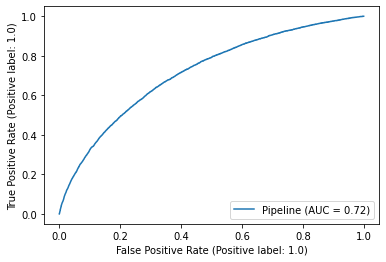

In [ ]:
metrics.plot_roc_curve(pipeline, X_validation, y_validation)

Random Forest

In [ ]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GridSearchCV(RandomForestClassifier(), param_grid={ 
        'n_estimators': [40, 50, 60],
        'max_features': ['auto'],
        'max_depth' : [15, 20, 25],
        'criterion' :['entropy']
    }, cv=4, refit=True))
])
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GridSearchCV(cv=4, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['entropy'],
                                          'max_depth': [15, 20, 25],
                                          'max_features': ['auto'],
                                          'n_estimators': [40, 50, 60]}))])

In [ ]:
pipeline_rf.named_steps['classifier'].best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'auto',
 'n_estimators': 60}

In [ ]:
print("Training set accuracy score: " + str(pipeline_rf.score(X_train, y_train)))
y_pred = pipeline_rf.predict(X_validation)
print("Validation set accuracy score:", str(accuracy_score(y_validation, y_pred)))
print("Log loss:", log_loss(y_validation, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Score ROC_AUC:", roc_auc_score(y_validation, pipeline_rf.predict_proba(X_validation)[:, 1]))

Training set accuracy score: 0.9977784538321671
Validation set accuracy score: 0.9802678590379431
Log loss: 0.6815396238505677
Confusion Matrix:
 [[67863  2761]
 [   28 70691]]
Score ROC_AUC: 0.9997644441407906


In [ ]:
model_results.append(['Random Forest (Phase 2)', pipeline_rf.score(X_train, y_train), accuracy_score(y_validation, y_pred)])

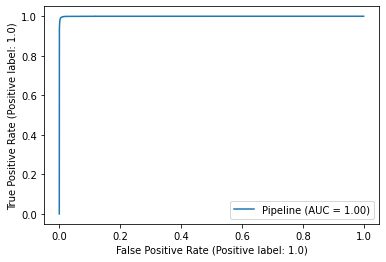

In [ ]:
metrics.plot_roc_curve(pipeline_rf, X_validation, y_validation)

In [ ]:
pd.DataFrame(model_results, columns = ["Model Name", "Training Accuracy", "Validation Accuracy"])

,Model Name,Training Accuracy,Validation Accuracy
0,Logistic Regression,0.919592,0.917919
1,Naive Bayes (Gaussian),0.135722,0.136689
2,Random Forest,0.999939,0.918088
3,Logistic Regression (Phase 2),0.919579,0.917892
4,Random Forest (Phase 2),0.997778,0.980267


# IMPACT OF NEW FEATURES

With the new features we have created columns which are much highly correlated with the `TARGET` and selected the top 18 features to train our model on.

The validation accuracy of Logistic Regression is quite good at 0.9195 but Random Forest attains an accuracy of 0.999, which we are assuming is because of an overfit. However, we will proceed to make the Kaggle submission for Phase 2 with this.

# KAGGLE SUBMISSION - PHASE 2

Prepare data to be merged with `df_test`

In [ ]:
print_memory_usage()

,DataFrame,Size
9,dataset[credit_card_balance],15
12,dataset[POS_CASH_balance],17
8,dataset[bureau_balance],18
10,dataset[installments_payments],20
11,dataset[previous_application],48
3,df_test,84
6,dataset[application_test],84
1,df_merged_dummies,434
7,dataset[bureau],512
5,dataset[application_train],536


Total: 3734


## Model validation and prediction

### Training Dataset

We now test the complete training dataset

In [ ]:
X = df_transformed[columns_greater_than_5].values
y = df_merged_dummies["TARGET"].values

Find the accuracy with the complete training dataset using Logistic Regression and the best estimator parameters-
`C=0.1`

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, C=0.1))
])
pipe.fit(X, y)
print("Accuracy score (training):", str(pipe.score(X, y)))

Accuracy score (training): 0.9191577235772358


Find the accuracy with the complete training dataset using Random Forest and the best estimator parameters-
`criterion='entropy', max_depth=25, max_features='auto', n_estimators=60`

In [ ]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(criterion='entropy', max_depth=25, max_features='auto', n_estimators=60))
])

pipe_rf.fit(X, y)
print("Accuracy score (training):", str(pipe_rf.score(X, y)))

Accuracy score (training): 0.9727154471544716


Just like Phase-2, we see that Random Forest classifier is giving a much higher accuracy score, hence we will proceed with the Kaggle submission with this.

### Cache both models

In [ ]:
import joblib
display(joblib.dump(pipe, "/content/drive/MyDrive/Group32_AML/LogisticRegression.model"))
display(joblib.dump(pipe_rf, "/content/drive/MyDrive/Group32_AML/RandomForest.model"))

['/content/drive/MyDrive/Group32_AML/LogisticRegression.model']

['/content/drive/MyDrive/Group32_AML/RandomForest.model']

In [ ]:
# # Load models from cache, only if required dynamically
# pipe = joblib.load("/content/drive/MyDrive/Group32_AML/LogisticRegression.model")
# pipe_rf = joblib.load("/content/drive/MyDrive/Group32_AML/RandomForest.model")

### Test Dataset
Here we get the same final columns as for the training dataset in the test dataset.

In [ ]:
del df_merged
del df_merged_dummies
del df_transformed
del datasets

In [ ]:
import gc
gc.collect()

473

In [ ]:
# First handle memory
print_memory_usage()

,DataFrame,Size
1,df_test,84
0,df_train,539


Total: 623


In [ ]:
del X_train
del X_validation
del y_train
del y_validation

Reload datasets for test data preparation

In [ ]:
try:
    del datasets
except Exception as e:
    pass

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    # print(df.info())
    # display(df.head(5))
    return df

HOME = "/content/drive/MyDrive/Group32_AML"
DATA_DIR = HOME + "/datasets/"
datasets = {}
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
application_test: shape is (48744, 121)
bureau: shape is (1716428, 17)
bureau_balance: shape is (27299925, 3)
credit_card_balance: shape is (3840312, 23)
installments_payments: shape is (13605401, 8)
previous_application: shape is (1670214, 37)
POS_CASH_balance: shape is (10001358, 8)


In [ ]:
df_test = datasets["application_test"]

In [ ]:
# Filter out all object types
datasets['installments_payments'] = datasets['installments_payments'].select_dtypes(exclude='object')
datasets['POS_CASH_balance'] = datasets['POS_CASH_balance'].select_dtypes(exclude='object')
datasets['previous_application'] = datasets['previous_application'].select_dtypes(exclude='object')
datasets['credit_card_balance'] = datasets['credit_card_balance'].select_dtypes(exclude='object')

In [ ]:
# Filter all data with SK_ID_CURR present in df_test
datasets['installments_payments'] = datasets['installments_payments'][datasets['installments_payments']["SK_ID_CURR"].isin(df_test["SK_ID_CURR"])]
datasets['POS_CASH_balance'] = datasets['POS_CASH_balance'][datasets['POS_CASH_balance']["SK_ID_CURR"].isin(df_test["SK_ID_CURR"])]
datasets['previous_application'] = datasets['previous_application'][datasets['previous_application']["SK_ID_CURR"].isin(df_test["SK_ID_CURR"])]
datasets['credit_card_balance'] = datasets['credit_card_balance'][datasets['credit_card_balance']["SK_ID_CURR"].isin(df_test["SK_ID_CURR"])]

In [ ]:
# Group-by SK_ID_CURR
datasets['installments_payments'] = datasets['installments_payments'].groupby("SK_ID_CURR", as_index=False).median()
datasets['POS_CASH_balance'] = datasets['POS_CASH_balance'].groupby("SK_ID_CURR", as_index=False).median()
datasets['previous_application'] = datasets['previous_application'].groupby("SK_ID_CURR", as_index=False).median()
datasets['credit_card_balance'] = datasets['credit_card_balance'].groupby("SK_ID_CURR", as_index=False).median()

In [ ]:
# Merge df_bureau and df_bureau_balance
datasets['bureau_balance'] = pd.merge(left=datasets['bureau'], right=datasets['bureau_balance'], how='left', left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU')

# Remove data in bureau balance, with SK_ID_CURR not present in df_train
del datasets['bureau'] # Delete bureau as no longer needed
datasets['bureau_balance'] = datasets['bureau_balance'].drop_duplicates()

# Group SK_ID_CURR and call min()
datasets['bureau_balance'] = datasets['bureau_balance'].groupby(['SK_ID_CURR','SK_ID_BUREAU']).min()

In [ ]:
# Select only required columns and group-by SK_ID_CURR
datasets['bureau_balance'] = datasets['bureau_balance'][['DAYS_CREDIT','DAYS_ENDDATE_FACT','AMT_CREDIT_SUM','DAYS_CREDIT_UPDATE','MONTHS_BALANCE']]
datasets['bureau_balance'] = datasets['bureau_balance'].reset_index()
datasets['bureau_balance'] = datasets['bureau_balance'].groupby('SK_ID_CURR').median()
datasets['bureau_balance'] = datasets['bureau_balance'].reset_index()
datasets['bureau_balance'] = datasets['bureau_balance'].select_dtypes(exclude="object")

In [ ]:
# Filter new bureau_balance merged table on SK_ID_CURR
datasets['bureau_balance'] = datasets['bureau_balance'][datasets['bureau_balance']["SK_ID_CURR"].isin(df_test["SK_ID_CURR"])]

In [ ]:
# Cache the current grouped dataset as it takes time
datasets['installments_payments'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_installments_payments_grouped.csv")
datasets['POS_CASH_balance'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_POS_CASH_balance_grouped.csv")
datasets['previous_application'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_previous_application_grouped.csv")
datasets['credit_card_balance'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_credit_card_balance_grouped.csv")
datasets['bureau_balance'].to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_bureau_balance_grouped.csv")

In [ ]:
# # ONLY RUN if dynamically loading from cache
# # Done to avoid computation times
# datasets['installments_payments'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_installments_payments_grouped.csv")
# datasets['POS_CASH_balance'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_POS_CASH_balance_grouped.csv")
# datasets['previous_application'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_previous_application_grouped.csv")
# datasets['credit_card_balance'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_credit_card_balance_grouped.csv")
# datasets['bureau_balance'] = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_bureau_balance_grouped.csv")

In [ ]:
pd.DataFrame(data=[["installments_payments", len(datasets['installments_payments'])],
                   ["POS_CASH_balance", len(datasets['POS_CASH_balance'])],
                   ["previous_application", len(datasets['previous_application'])],
                   ["credit_card_balance", len(datasets['credit_card_balance'])],
                   ["bureau_balance", len(datasets['bureau_balance'])]], columns=["Table", "Rows"])

,Table,Rows
0,installments_payments,47944
1,POS_CASH_balance,47808
2,previous_application,47800
3,credit_card_balance,16653
4,bureau_balance,42320


### Merge all datasets for test

In [ ]:
key = "SK_ID_CURR"

In [ ]:
df_test_merged = pd.merge(left=df_test, right=datasets['previous_application'], how='left', left_on=key, right_on=key)
df_test_merged = pd.merge(left=df_test_merged, right=datasets['POS_CASH_balance'], how='left', left_on=key, right_on=key)
df_test_merged = pd.merge(left=df_test_merged, right=datasets['credit_card_balance'], how='left', left_on=key, right_on=key)
df_test_merged = pd.merge(left=df_test_merged, right=datasets['installments_payments'], how='left', left_on=key, right_on=key)
df_test_merged = pd.merge(left=df_test_merged, right=datasets['bureau_balance'], how='left', left_on=key, right_on=key)

In [ ]:
df_test_merged.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Unnamed: 0,SK_ID_BUREAU,DAYS_CREDIT,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,-1715.0,3980.925,3980.925,0.0,5896633.0,-857.0,-715.0,168345.00,-155.0,-28.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,-585.0,4813.200,4813.200,4.0,6735201.0,-137.0,-123.0,58500.00,-31.0,-4.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,-1383.0,1125.000,688.545,10.0,5922081.5,-1835.0,-1168.0,391770.00,-882.0,-59.5
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,-812.0,5897.520,4650.300,22.0,6356884.5,-1612.0,-1375.0,129614.04,-683.5,-52.5
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,-634.0,11100.600,11100.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cache the current grouped dataset as it takes time
df_test_merged.to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_merged.csv")

In [ ]:
# # ONLY RUN if dynamically loading from cache
# # Done to avoid computation times
# df_test_merged = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_merged.csv")

### Convert categorical data to numerical and overwrite merged dataset

In [ ]:
df_test_dummies = pd.get_dummies(df_test_merged)
df_test_dummies

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,...,0,0,0,0,0,0,0,0,0,0
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,...,0,0,0,0,0,0,0,0,0,0
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,...,0,0,0,0,0,0,1,0,1,0
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,...,0,0,0,0,0,1,0,0,1,0


Remove unnecessary columns not present in `df_merged_dummies`

In [ ]:
columns_not_present = df_test_dummies.columns[~df_test_dummies.columns.isin(df_merged_dummies)]
columns_not_present

Index([], dtype='object')

In [ ]:
df_test_dummies.drop(columns=columns_not_present, inplace=True)
df_test_dummies

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,...,0,0,0,0,0,0,0,0,0,0
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,...,0,0,0,0,0,0,0,0,0,0
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,...,0,0,0,0,0,0,1,0,1,0
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
duplicated_columns = df_test_dummies.columns[df_test_dummies.columns.duplicated()]
duplicated_columns

Index(['Unnamed: 0_x', 'SK_ID_PREV_x', 'Unnamed: 0_y', 'SK_ID_PREV_y'], dtype='object')

In [ ]:
# https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
df_test_dummies = df_test_dummies.loc[:, ~df_test_dummies.columns.duplicated()]

In [ ]:
df_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 303 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(126), int64(40), uint8(137)
memory usage: 68.5 MB


Cache the new data

In [ ]:
# Cache the current grouped dataset as it takes time
df_test_dummies.to_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_merged_interpolated.csv")

In [ ]:
# # ONLY RUN if dynamically loading from cache
# # Done to avoid computation times
# df_test_dummies = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_merged_interpolated.csv")

Apply the Column Transformer on the merged test data

In [ ]:
from sklearn.compose import ColumnTransformer

# Create a basic numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Column transform pipeline
data_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, df_test_dummies.columns)
], n_jobs = -1)

# Run the transform
data_transformed = data_pipeline.fit_transform(df_test_dummies)

In [ ]:
df_test_transformed = pd.DataFrame(data_transformed,  columns=df_test_dummies.columns)
del data_transformed
df_test_transformed

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0.0,100001.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,100005.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,100013.0,0.0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038.0,-4458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,100028.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4.0,100038.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,48739.0,456221.0,0.0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970.0,-5169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,48740.0,456222.0,2.0,157500.0,622413.0,31909.5,495000.0,0.035792,-11186.0,-1149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,48741.0,456223.0,1.0,202500.0,315000.0,33205.5,315000.0,0.026392,-15922.0,-3037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
48742,48742.0,456224.0,0.0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968.0,-2731.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Create new features for test data

In [ ]:
# We've added one to certain terms to avoid division by zero error
df_test_transformed['F1_RCV:BAL'] = df_test_transformed['AMT_TOTAL_RECEIVABLE'] / (df_test_transformed['AMT_BALANCE'] + 1)
df_test_transformed['F2_TRC:RCV'] = df_test_transformed['AMT_TOTAL_RECEIVABLE'] / (df_test_transformed['AMT_RECIVABLE'] + 1)
df_test_transformed['F3_TRC:RCP'] = df_test_transformed['AMT_TOTAL_RECEIVABLE'] / (df_test_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_test_transformed['F4_BAL:RCV'] = df_test_transformed['AMT_BALANCE'] / (df_test_transformed['AMT_RECIVABLE'] + 1)
df_test_transformed['F5_BAL:RCP'] = df_test_transformed['AMT_BALANCE'] / (df_test_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_test_transformed['F6_RCV:RCP'] = df_test_transformed['AMT_RECIVABLE'] / (df_test_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_test_transformed['F7_EXT:RCV'] = (df_test_transformed['EXT_SOURCE_1'] + df_test_transformed['EXT_SOURCE_2'] + df_test_transformed['EXT_SOURCE_3']) / (df_test_transformed['AMT_TOTAL_RECEIVABLE'] + 1)
df_test_transformed['F8_SUM_EXT'] = (df_test_transformed['EXT_SOURCE_1'] + df_test_transformed['EXT_SOURCE_2'] + df_test_transformed['EXT_SOURCE_3'])
df_test_transformed['F9_PRD_EXT'] = (df_test_transformed['EXT_SOURCE_1'] * df_test_transformed['EXT_SOURCE_2'] * df_test_transformed['EXT_SOURCE_3'])
df_test_transformed['F10_EXT_RATIO'] = (df_test_transformed['EXT_SOURCE_1'] + df_test_transformed['EXT_SOURCE_2'] * 2 + df_test_transformed['EXT_SOURCE_3'] * 3)
df_test_transformed['F11_MAX_EXT'] = [max(x, y, z) for x, y, z in zip(df_test_transformed['EXT_SOURCE_1'], df_test_transformed['EXT_SOURCE_2'], df_test_transformed['EXT_SOURCE_3'])]

## Prediction

In [ ]:
# Get the X (features)
X = df_test_transformed[columns_greater_than_5]

In [ ]:
# Get the values
X = X.values

### Predict using the best model (Random Forest classifer)

In [ ]:
# Predict for the new test data
result = pipe_rf.predict(X)

# Get the prob
result_prob = pipe.predict_proba(X)

# Create data frame for result
df_result = pd.DataFrame(result, columns=['result'])

# Prepare the final submission
df_result[['class_0_prob', 'class_1_prob']] = result_prob
final_submission = pd.DataFrame()

# Set columns SK_ID_CURR and TARGET with respective values
final_submission['SK_ID_CURR'] = df_test['SK_ID_CURR']
final_submission['TARGET'] = df_result['class_1_prob']

# Set the index as SK_ID_CURR
final_submission = final_submission.set_index('SK_ID_CURR')

In [ ]:
final_submission

,TARGET
SK_ID_CURR,
100001,0.045167
100005,0.166401
100013,0.027187
100028,0.046405
100038,0.123737
...,...
456221,0.041753
456222,0.051881
456223,0.070979


In [ ]:
final_submission.to_csv("submission.csv")

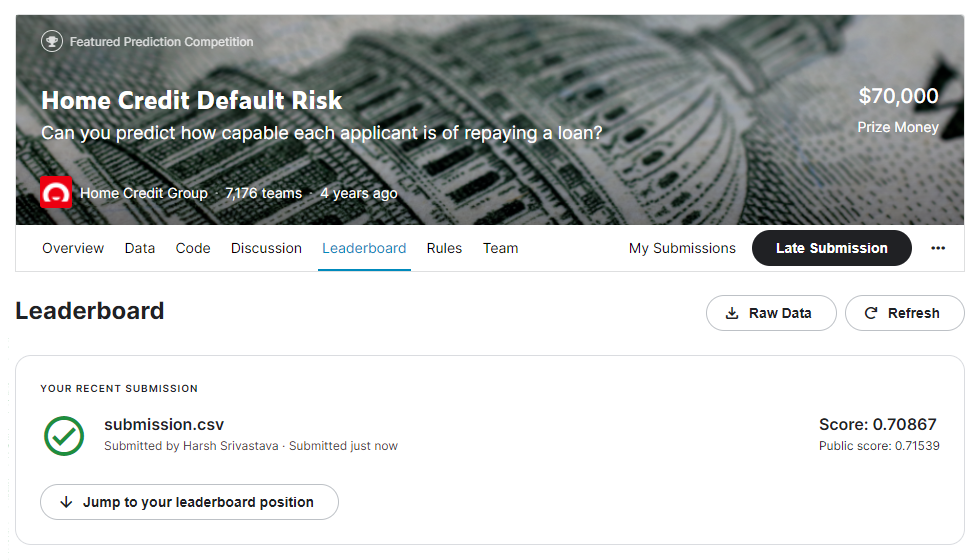

# PHASE 3 - Neural Networks

We are going to build a neural network model with four layers and modifiable neuron counts per layer.

1. In this phase we will first run a basic neural network with the original columns for the Phase 2 filtered dataset. Based on previous correlations we will increase the threshold on correlation to filter out columns that do not contribute to our model.
2. We will then build a different model on the filtered columns and then perform validation. If the accuracy is higher we will continue, else conclude that the model we have is the best so far.

## Make Elementary Neural Network Model

Scale and normalize the training data

In [ ]:
df_train_scaled = df_transformed[columns_greater_than_5]

In [ ]:
pd.DataFrame(data=zip(df_train_scaled.columns, df_train_scaled.min(), df_train_scaled.max()), columns=["Column", "Min", "Max"])

,Column,Min,Max
0,F10_EXT_RATIO,-2.014893,6.937189
1,F8_SUM_EXT,-0.830280,3.945919
2,EXT_SOURCE_2,-0.194183,1.015776
3,F9_PRD_EXT,-0.821023,1.672735
4,EXT_SOURCE_3,-0.801118,1.985320
5,F11_MAX_EXT,0.025899,2.477270
6,DAYS_BIRTH,-25229.000000,-7489.000000
7,DAYS_CREDIT,-5425.810119,2620.706962
8,REGION_RATING_CLIENT_W_CITY,1.000000,3.000000
9,REGION_RATING_CLIENT,1.000000,3.000000


In [ ]:
# Now we do selective column scaling
df_train_scaled.std()

F10_EXT_RATIO                              0.821975
F8_SUM_EXT                                 0.420202
EXT_SOURCE_2                               0.191119
F9_PRD_EXT                                 0.118901
EXT_SOURCE_3                               0.205426
F11_MAX_EXT                                0.164373
DAYS_BIRTH                              4363.988872
DAYS_CREDIT                              647.889361
REGION_RATING_CLIENT_W_CITY                0.502736
REGION_RATING_CLIENT                       0.509034
NAME_INCOME_TYPE_Working                   0.499734
NAME_EDUCATION_TYPE_Higher education       0.429160
DAYS_LAST_PHONE_CHANGE                   826.816032
CODE_GENDER_M                              0.474263
CODE_GENDER_F                              0.474263
DAYS_CREDIT_UPDATE                       494.223739
DAYS_ID_PUBLISH                         1509.452794
REG_CITY_NOT_WORK_CITY                     0.421125
dtype: float64

Since the standard deviation is looking uniform just like test data (look below during Kaggle submission), we simply can use standard scaler and then train our model on it.

In [ ]:
standard_scaler = StandardScaler()
df_train_scaled = pd.DataFrame(standard_scaler.fit_transform(df_train_scaled), columns=df_train_scaled.columns)

Build the neural network.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
writer = SummaryWriter("/content/drive/MyDrive/Group32_AML/runs/")

In [ ]:
X = df_train_scaled.values
y = df_merged_dummies["TARGET"].values

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_validation = torch.FloatTensor(X_validation)
y_train = torch.tensor(y_train, dtype=torch.long, device=device)
y_validation = torch.tensor(y_validation, dtype=torch.long, device=device)

In [ ]:
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_features=18, hidden_layer1=50, hidden_layer2=80, hidden_layer3=32, hidden_layer4=10, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden_layer1)
        self.f_connected2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.f_connected3 = nn.Linear(hidden_layer2, hidden_layer3)
        self.f_connected4 = nn.Linear(hidden_layer3, hidden_layer4)
        self.out = nn.Linear(hidden_layer4, out_features)

    def forward(self,x):
        x = F.leaky_relu(self.f_connected1(x))
        x = F.dropout(x, p=0.4)
        x = F.leaky_relu(self.f_connected2(x))
        x = F.leaky_relu(self.f_connected3(x))
        x = F.leaky_relu(self.f_connected4(x))
        x = self.out(x)
        return x

### Step 1 - Elementaty Model

In [ ]:
torch.manual_seed(20)
model = NeuralNetworkModel().to(device)

In [ ]:
loss_function = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adadelta(model.parameters(),lr=0.001)

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
# optimizer = torch.optim.Adamax(model.parameters(),lr=0.001)

In [ ]:
row_count = y_train.shape[0]
epochs = 1000
final_losses = []
last_accuracy = 0.0
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss.item())
    _,predicted = torch.max(y_pred, 1)
    running_correct = (predicted == y_train).sum().item()
    accuracy = running_correct / row_count

    if i % 100 == 1:
        print("Epoch: {} and the loss: {} accuracy : {}".format(i, loss.item(), accuracy))
        writer.add_scalar('Training loss', loss.item(), i)
        writer.add_scalar('Accuracy', running_correct / row_count, i)

        if np.round(accuracy, 5) == np.round(last_accuracy):
            break

    last_accuracy = accuracy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1 and the loss: 0.25475820899009705 accuracy : 0.9195243902439024
Epoch: 101 and the loss: 0.25448888540267944 accuracy : 0.9195243902439024
Epoch: 201 and the loss: 0.25433599948883057 accuracy : 0.9195243902439024
Epoch: 301 and the loss: 0.2541849911212921 accuracy : 0.9195243902439024
Epoch: 401 and the loss: 0.2540402114391327 accuracy : 0.9195243902439024
Epoch: 501 and the loss: 0.2538731098175049 accuracy : 0.9195243902439024
Epoch: 601 and the loss: 0.2537517547607422 accuracy : 0.9195243902439024
Epoch: 701 and the loss: 0.25354281067848206 accuracy : 0.9195243902439024
Epoch: 801 and the loss: 0.2535628080368042 accuracy : 0.9195243902439024
Epoch: 901 and the loss: 0.25340819358825684 accuracy : 0.9195243902439024


In [ ]:
torch.save(model, "/content/drive/MyDrive/Group32_AML/NeuralNetwork18Features.model")

In [ ]:
# # Load model from cache
# model = torch.load("/content/drive/MyDrive/Group32_AML/NeuralNetwork18Features.model")

In [ ]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_validation):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
cm = confusion_matrix(y_validation, predictions)
cm

array([[56474,     0],
       [ 5026,     0]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_validation, predictions)
score

0.9182764227642276

In [ ]:
model_results.append(["Neural Network (18 features)", score, last_accuracy])

In [ ]:
writer.close()
writer = SummaryWriter("/content/drive/MyDrive/Group32_AML/runs/")

Our accuracy is still quite good, but less than that of Logistic Regression from Phase 2 (0.9195). So now we move to step 2 and refine our columns.

## Step 2 - Refine Columns (Iteration 1)

Using our previously formed df_transformed with all columns, we find the highly correlated features once again.

In [ ]:
all_corr_target = df_transformed.corr()["TARGET"]
all_corr_target

Unnamed: 0         -0.002140
SK_ID_CURR         -0.002137
TARGET              1.000000
CNT_CHILDREN        0.019143
AMT_INCOME_TOTAL   -0.003970
                      ...   
F7_EXT:RCV         -0.023481
F8_SUM_EXT         -0.170612
F9_PRD_EXT         -0.138242
F10_EXT_RATIO      -0.191394
F11_MAX_EXT        -0.104619
Name: TARGET, Length: 315, dtype: float64

In [ ]:
all_corr_target = all_corr_target.sort_values(key=abs,ascending=False).reset_index()
all_corr_target.columns = ["Feature", "Correlation"]
all_corr_target

,Feature,Correlation
0,TARGET,1.000000
1,F10_EXT_RATIO,-0.191394
2,F8_SUM_EXT,-0.170612
3,EXT_SOURCE_2,-0.160066
4,F9_PRD_EXT,-0.138242
...,...,...
310,AMT_REQ_CREDIT_BUREAU_HOUR,-0.000139
311,ORGANIZATION_TYPE_Advertising,0.000118
312,ORGANIZATION_TYPE_Industry: type 7,-0.000093
313,AMT_DRAWINGS_POS_CURRENT,-0.000083


In [ ]:
columns_all_highly_correlated = all_corr_target[abs(all_corr_target["Correlation"]) > 0.1][1:]
columns_all_highly_correlated

,Feature,Correlation
1,F10_EXT_RATIO,-0.191394
2,F8_SUM_EXT,-0.170612
3,EXT_SOURCE_2,-0.160066
4,F9_PRD_EXT,-0.138242
5,EXT_SOURCE_3,-0.133961
6,F11_MAX_EXT,-0.104619


New model with less columns above 0.06 correlation

In [ ]:
# Get just the TARGET column
y = df_transformed["TARGET"].values

In [ ]:
# Get the X (features) from df_test_transformed
X_new = df_train_scaled[columns_all_highly_correlated["Feature"]]
X_new

,F10_EXT_RATIO,F8_SUM_EXT,EXT_SOURCE_2,F9_PRD_EXT,EXT_SOURCE_3,F11_MAX_EXT
0,-2.480035,-2.482697,-1.315775,-1.128997,-1.810437,-2.584569
1,0.077469,-0.167967,0.564198,-0.300201,0.064327,-0.398705
2,0.879380,0.582511,0.217116,0.509607,1.062574,0.254206
3,1.488839,1.260881,0.711729,1.515850,1.358001,0.623416
4,0.623172,0.575884,-1.002934,0.266983,1.124304,0.331353
...,...,...,...,...,...,...
307495,-0.126834,-0.516958,0.874930,-0.750545,-0.132025,-0.037413
307496,-2.278210,-1.908189,-2.084705,-1.080171,-1.636549,-1.533710
307497,-0.722088,-0.071363,0.111473,-0.420911,-1.423517,0.342174
307498,1.029447,1.301656,-0.001331,1.419068,0.728911,1.293299


In [ ]:
X_new = X_new.values

Build new model

In [ ]:
class NeuralNetworkModel6Columns(nn.Module):
    def __init__(self, input_features=6, hidden_layer1=50, hidden_layer2=32, hidden_layer3=16, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden_layer1)
        self.f_connected2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.f_connected3 = nn.Linear(hidden_layer2, hidden_layer3)
        self.out = nn.Linear(hidden_layer3, out_features)

    def forward(self,x):
        x = F.leaky_relu(self.f_connected1(x))
        x = F.dropout(x, p=0.4)
        x = F.leaky_relu(self.f_connected2(x))
        x = F.leaky_relu(self.f_connected3(x))
        x = self.out(x)
        return x

Train model on the newly filtered data columns.

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_new, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_validation = torch.FloatTensor(X_validation)
y_train = torch.tensor(y_train, dtype=torch.long, device=device)
y_validation = torch.tensor(y_validation, dtype=torch.long, device=device)

In [ ]:
torch.manual_seed(20)
# new_model = NeuralNetworkModel(input_features=9, hidden_layer1=100, hidden_layer2=80, hidden_layer3=40, hidden_layer4=16, out_features=2).to(device)
new_model = NeuralNetworkModel6Columns().to(device)

In [ ]:
new_loss_function = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adadelta(model.parameters(),lr=0.001)

new_optimizer = torch.optim.Adam(new_model.parameters(),lr=0.001)
# optimizer = torch.optim.Adamax(model.parameters(),lr=0.001)

In [ ]:
row_count = y_train.shape[0]
epochs = 1000
final_losses = []
last_accuracy = 0.0
for i in range(epochs):
    i += 1
    y_pred = new_model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss.item())
    _,predicted = torch.max(y_pred, 1)
    running_correct = (predicted == y_train).sum().item()
    accuracy = running_correct / row_count

    if i % 100 == 1:
        print("Epoch: {} and the loss: {} accuracy : {}".format(i, loss.item(), accuracy))
        writer.add_scalar('Training loss', loss.item(), i)
        writer.add_scalar('Accuracy', running_correct / row_count, i)

        if np.round(accuracy, 5) == np.round(last_accuracy):
            break

    last_accuracy = accuracy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1 and the loss: 0.7414618134498596 accuracy : 0.10036585365853659
Epoch: 101 and the loss: 0.7415406107902527 accuracy : 0.10043089430894309
Epoch: 201 and the loss: 0.7414897084236145 accuracy : 0.10036991869918699
Epoch: 301 and the loss: 0.7415586709976196 accuracy : 0.09965853658536586
Epoch: 401 and the loss: 0.7415090203285217 accuracy : 0.10021138211382113
Epoch: 501 and the loss: 0.7415147423744202 accuracy : 0.10031707317073171
Epoch: 601 and the loss: 0.7415100932121277 accuracy : 0.1001869918699187
Epoch: 701 and the loss: 0.741520881652832 accuracy : 0.10044715447154472
Epoch: 801 and the loss: 0.7415565252304077 accuracy : 0.10013821138211382
Epoch: 901 and the loss: 0.741543710231781 accuracy : 0.10043089430894309


In [105]:
torch.save(new_model, "/content/drive/MyDrive/Group32_AML/NeuralNetwork6Features.model")

In [106]:
# # Load model from cache
# new_model = torch.load("/content/drive/MyDrive/Group32_AML/NeuralNetwork9Features.model")

In [107]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_validation):
        y_pred = new_model(data)
        predictions.append(y_pred.argmax().item())

In [108]:
from sklearn.metrics import confusion_matrix, roc_auc_score
cm = confusion_matrix(y_validation, predictions)
cm

array([[ 1650, 54824],
       [  492,  4534]])

In [109]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_validation, predictions)
score

0.10055284552845528

In [112]:
model_results.append(["Neural Network (6 features)", score, last_accuracy])

Generate tensorboard plots

In [ ]:
writer.close()

## TensorBoard graphs (for all runs we did)

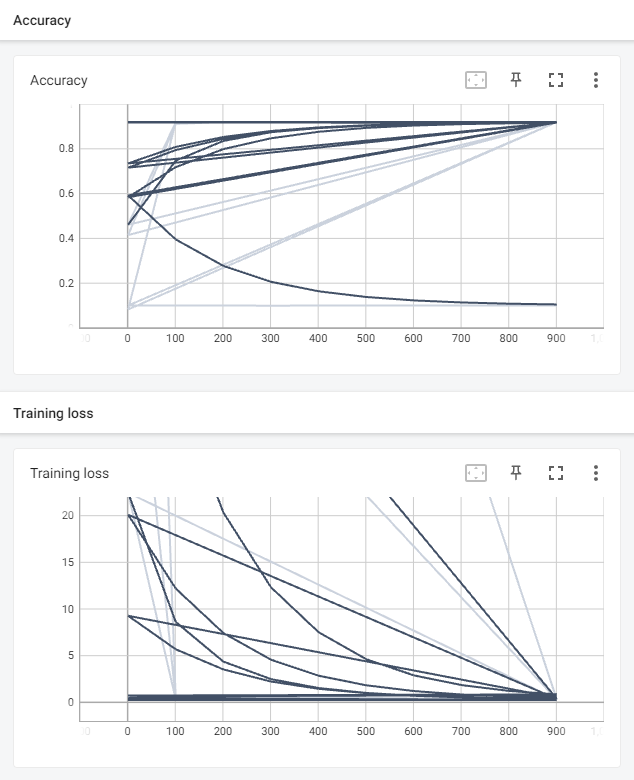

## Most successful results on TensorBoard

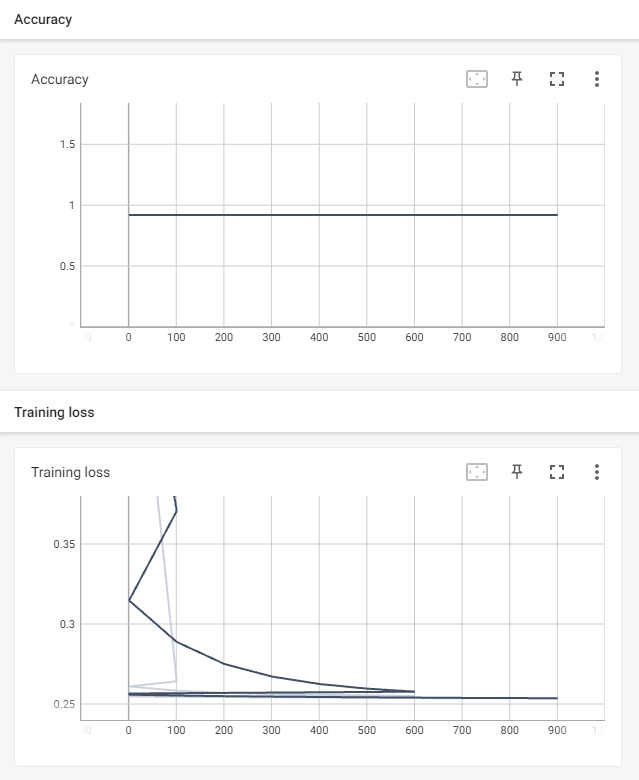

# Results and Discussion:

## **Final Pipeline(Diagram)**
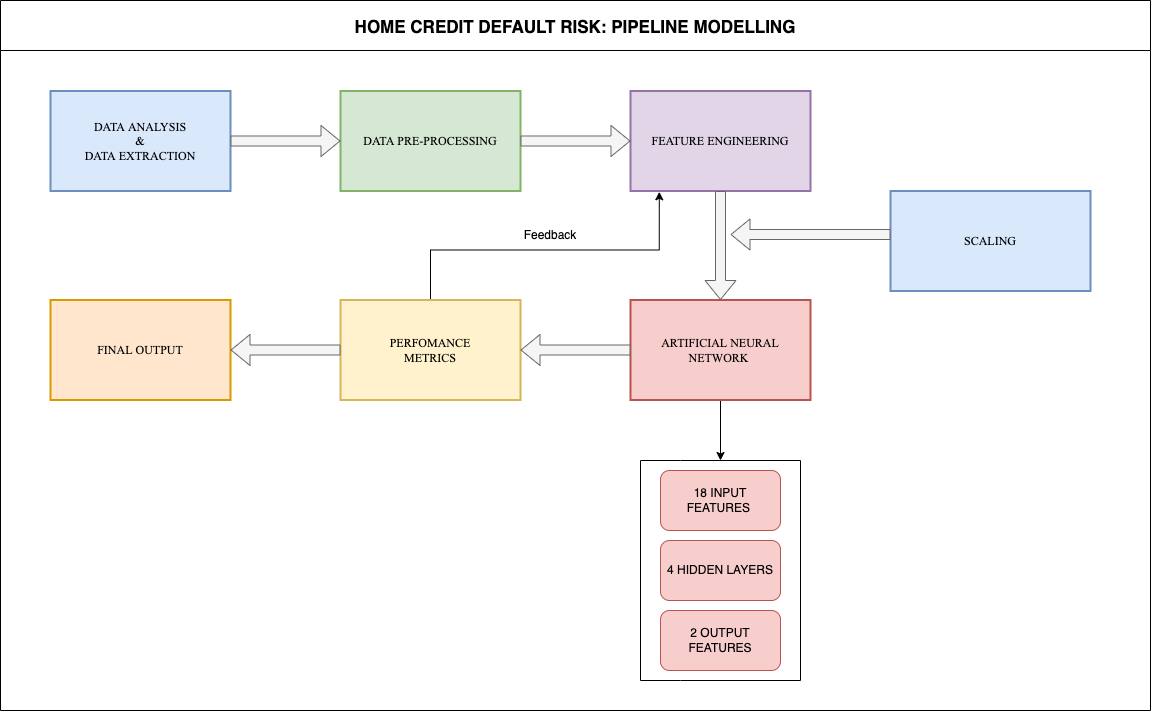


## **Number of input features*
We've taken 18 features as input and hidden layers as 50, 80, 32, 10 and 2 output features

## **Loss function used**: Cross entropy loss

## **Number of experiments conducted**
A total of 14 experiments were conducted, but got overwritten as we only had sections for two models once we ran the final notebook. We ran different models with different layers of perceptrons and layer counts and chose the best as the one with 18 input features and 50, 80, 32, 10 hidden layers.

In [116]:
pd.DataFrame(model_results, columns = ["Model Name", "Training Accuracy", "Validation Accuracy"])

,Model Name,Training Accuracy,Validation Accuracy
0,Logistic Regression,0.919592,0.917919
1,Naive Bayes (Gaussian),0.135722,0.136689
2,Random Forest,0.999939,0.918088
3,Logistic Regression (Phase 2),0.919579,0.917892
4,Random Forest (Phase 2),0.997778,0.980267
5,Neural Network (18 features),0.919524,0.918276
6,Neural Network (6 features),0.100430,0.100552


### Inference for Phase 3
We have tried two models each with different layers of perceptrons and with different feature counts. Upon validating both models we see that the first model gives a better validation accuracy (0.918), and the second model (with 6 features), doesn't give a good accuracy.

Our inference is that the first model is the best fit and is not overfitting because we also tried it with lesser columns but it gives us the best accuracy at the 18 columns from Phase 2. Now second model is definitely under-fitting because of the accuracy.

> Therefore we will proceed with the Neural Network model to get the Kaggle score.

Based on our results, we can see that the accuracy of logistic regression and Neural Network (18 features) is very close (~0.919). Based on this we can conclude both models to be a good choice. However, when tested with the validation set we get a slightly higher accuracy with the Neural Network.

# KAGGLE SUBMISSION - PHASE 3
We will load the saved `df_test_merged_interpolated.csv` into df_test_dummies (which was the table from Phase 2 with the final filtered 18 columns)

In [ ]:
# Reload test data from saved cache
df_test_dummies = pd.read_csv("/content/drive/MyDrive/Group32_AML/datasets/df_test_merged_interpolated.csv")

Transform the data

In [ ]:
from sklearn.compose import ColumnTransformer

# Create a basic numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Column transform pipeline
data_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, df_test_dummies.columns)
], n_jobs = -1)

# Run the transform
data_transformed = data_pipeline.fit_transform(df_test_dummies)
df_test_transformed = pd.DataFrame(data_transformed,  columns=df_test_dummies.columns)
del data_transformed
df_test_transformed

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0.0,100001.0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241.0,-2329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,100005.0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064.0,-4469.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,100013.0,0.0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038.0,-4458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,100028.0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976.0,-1866.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4.0,100038.0,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,-13040.0,-2191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,48739.0,456221.0,0.0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970.0,-5169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,48740.0,456222.0,2.0,157500.0,622413.0,31909.5,495000.0,0.035792,-11186.0,-1149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,48741.0,456223.0,1.0,202500.0,315000.0,33205.5,315000.0,0.026392,-15922.0,-3037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
48742,48742.0,456224.0,0.0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968.0,-2731.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Recreate new features
df_test_transformed['F1_RCV:BAL'] = df_test_transformed['AMT_TOTAL_RECEIVABLE'] / (df_test_transformed['AMT_BALANCE'] + 1)
df_test_transformed['F2_TRC:RCV'] = df_test_transformed['AMT_TOTAL_RECEIVABLE'] / (df_test_transformed['AMT_RECIVABLE'] + 1)
df_test_transformed['F3_TRC:RCP'] = df_test_transformed['AMT_TOTAL_RECEIVABLE'] / (df_test_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_test_transformed['F4_BAL:RCV'] = df_test_transformed['AMT_BALANCE'] / (df_test_transformed['AMT_RECIVABLE'] + 1)
df_test_transformed['F5_BAL:RCP'] = df_test_transformed['AMT_BALANCE'] / (df_test_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_test_transformed['F6_RCV:RCP'] = df_test_transformed['AMT_RECIVABLE'] / (df_test_transformed['AMT_RECEIVABLE_PRINCIPAL'] + 1)
df_test_transformed['F7_EXT:RCV'] = (df_test_transformed['EXT_SOURCE_1'] + df_test_transformed['EXT_SOURCE_2'] + df_test_transformed['EXT_SOURCE_3']) / (df_test_transformed['AMT_TOTAL_RECEIVABLE'] + 1)
df_test_transformed['F8_SUM_EXT'] = (df_test_transformed['EXT_SOURCE_1'] + df_test_transformed['EXT_SOURCE_2'] + df_test_transformed['EXT_SOURCE_3'])
df_test_transformed['F9_PRD_EXT'] = (df_test_transformed['EXT_SOURCE_1'] * df_test_transformed['EXT_SOURCE_2'] * df_test_transformed['EXT_SOURCE_3'])
df_test_transformed['F10_EXT_RATIO'] = (df_test_transformed['EXT_SOURCE_1'] + df_test_transformed['EXT_SOURCE_2'] * 2 + df_test_transformed['EXT_SOURCE_3'] * 3)
df_test_transformed['F11_MAX_EXT'] = [max(x, y, z) for x, y, z in zip(df_test_transformed['EXT_SOURCE_1'], df_test_transformed['EXT_SOURCE_2'], df_test_transformed['EXT_SOURCE_3'])]

In [ ]:
df_test_transformed.drop(columns=["Unnamed: 0"], inplace=True)

## Scale the data

In [ ]:
df_test_scaled = df_test_transformed[columns_greater_than_5].round(6)

In [ ]:
pd.DataFrame(data=zip(df_test_scaled.columns, df_test_scaled.min(), df_test_scaled.max()), columns=["Column", "Min", "Max"])

,Column,Min,Max
0,F10_EXT_RATIO,0.184264,4.895597
1,F8_SUM_EXT,0.074324,2.463086
2,EXT_SOURCE_2,0.000008,0.855000
3,F9_PRD_EXT,0.000000,0.548405
4,EXT_SOURCE_3,0.000527,0.882530
5,F11_MAX_EXT,0.053478,0.939145
6,DAYS_BIRTH,-25195.000000,-7338.000000
7,DAYS_CREDIT,-2921.000000,0.000000
8,REGION_RATING_CLIENT_W_CITY,-1.000000,3.000000
9,REGION_RATING_CLIENT,1.000000,3.000000


In [ ]:
df_test_scaled.std()

F10_EXT_RATIO                              0.700897
F8_SUM_EXT                                 0.327164
EXT_SOURCE_2                               0.181263
F9_PRD_EXT                                 0.086696
EXT_SOURCE_3                               0.171825
F11_MAX_EXT                                0.114472
DAYS_BIRTH                              4325.900393
DAYS_CREDIT                              541.857595
REGION_RATING_CLIENT_W_CITY                0.515804
REGION_RATING_CLIENT                       0.522694
NAME_INCOME_TYPE_Working                   0.499994
NAME_EDUCATION_TYPE_Higher education       0.436856
DAYS_LAST_PHONE_CHANGE                   878.920740
CODE_GENDER_M                              0.470073
CODE_GENDER_F                              0.470073
DAYS_CREDIT_UPDATE                       408.703135
DAYS_ID_PUBLISH                         1569.276709
REG_CITY_NOT_WORK_CITY                     0.417365
dtype: float64

In [ ]:
standard_scaler = StandardScaler()
df_test_scaled = pd.DataFrame(standard_scaler.fit_transform(df_test_scaled), columns=df_train_scaled.columns)

In [ ]:
df_test_scaled

,F10_EXT_RATIO,F8_SUM_EXT,EXT_SOURCE_2,F9_PRD_EXT,EXT_SOURCE_3,F11_MAX_EXT,DAYS_BIRTH,DAYS_CREDIT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,CODE_GENDER_F,DAYS_CREDIT_UPDATE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,-0.323955,0.557773,1.498570,-0.462033,-1.982191,1.325525,-0.733477,3.606020e-01,-0.024421,-0.073004,0.993416,1.701333,-0.753470,-0.701175,0.701175,7.160114e-01,1.427241,-0.538296
1,-0.842291,-0.702100,-1.248832,-0.732613,-0.390773,-0.637109,-0.461392,1.689378e+00,-0.024421,-0.073004,0.993416,-0.587774,1.226251,1.426178,-1.426178,1.019413e+00,0.910437,-0.538296
2,0.993292,0.894519,1.002783,0.916162,0.645347,0.540459,-0.917718,-1.444319e+00,-0.024421,-0.073004,0.993416,1.701333,0.252319,1.426178,-1.426178,-1.062804e+00,-0.287579,-0.538296
3,0.493176,0.393716,-0.046033,0.338172,0.655316,-0.220286,0.483623,-1.032767e+00,-0.024421,-0.073004,0.993416,-0.587774,-0.827425,-0.701175,0.701175,-5.771165e-01,-0.736836,-0.538296
4,-0.690127,-1.196257,-0.509397,-1.059170,0.000002,-1.203927,0.699997,-6.451606e-10,-0.024421,-0.073004,0.993416,-0.587774,0.292141,1.426178,-1.426178,-5.742503e-10,-0.771247,1.857714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.984274,0.835899,0.720252,0.855386,0.831789,0.093078,-0.901998,8.330557e-01,1.914319,1.840181,0.993416,-0.587774,0.448016,-0.701175,0.701175,8.530316e-01,-0.221306,-0.538296
48740,0.475323,0.509152,0.918976,0.423667,0.000002,0.407752,1.128582,-6.451606e-10,-0.024421,-0.073004,-1.006628,-0.587774,1.226251,-0.701175,0.701175,-5.742503e-10,0.031042,1.857714
48741,-0.267319,0.399432,0.633058,-0.036646,-1.259400,0.834997,0.033770,1.298127e+00,-0.024421,-0.073004,-1.006628,-0.587774,0.272799,-0.701175,0.701175,7.062243e-01,0.986269,-0.538296
48742,0.019008,-0.321125,-0.398982,-0.413437,0.554934,-0.370963,0.485473,-6.802725e-01,-0.024421,-0.073004,-1.006628,1.701333,-1.399724,1.426178,-1.426178,-1.493439e+00,1.075483,1.857714


## Prediction

In [ ]:
# Initialize X and y
X = df_test_scaled # [columns_all_highly_correlated["Feature"]]
X_test = torch.FloatTensor(X.values)

In [ ]:
predictions = []
probs = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        # Predict item
        y_pred = model(data)

        # Get probability and prediction
        probs.append(F.softmax(y_pred)[1].item())
        predictions.append(y_pred.argmax().item())

In [ ]:
# Prepare submission
final_submission = pd.DataFrame()

# Set columns SK_ID_CURR and TARGET with respective values
final_submission['SK_ID_CURR'] = df_test_transformed['SK_ID_CURR'].astype(int)
final_submission['TARGET'] = probs

# Set the index as SK_ID_CURR
final_submission = final_submission.set_index('SK_ID_CURR')

In [ ]:
final_submission

,TARGET
SK_ID_CURR,
100001,0.038358
100005,0.171255
100013,0.027056
100028,0.046264
100038,0.154696
...,...
456221,0.032200
456222,0.056499
456223,0.081611


In [ ]:
final_submission.to_csv("submission.csv")

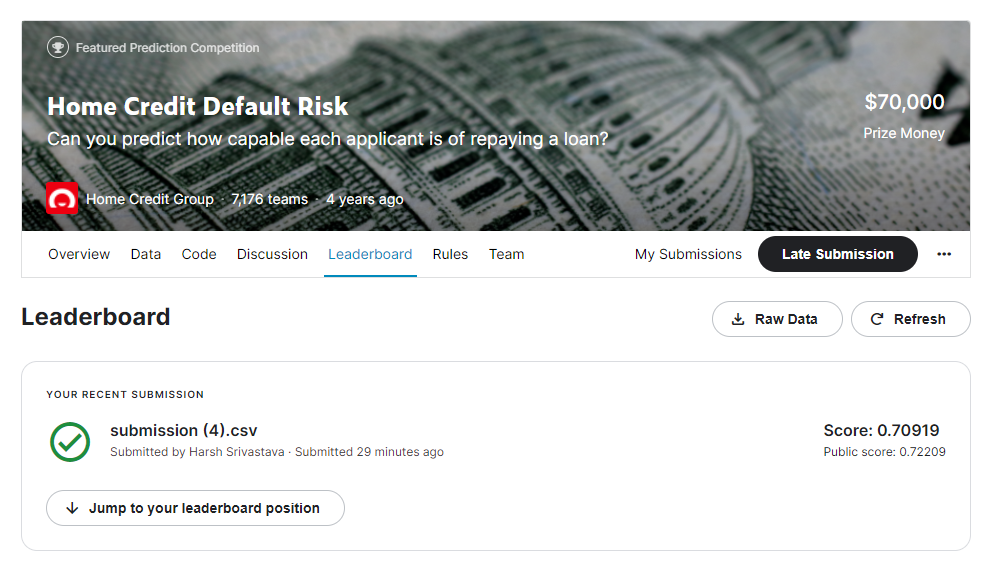

  # Conclusion

In conclusion, we started experimenting with the different data columns, and selected most correlated columns to `TARGET`. After this we converted object typed / categorical types to numerical values by expanding our columns with multiple columns encoded in one-hot encoding for a certain class label corresponding to each unique value. After this we interpolated this data to fill any 'nan' values that might be remaining. It was after this stage that we were able to form any meaningful conclusions. We also made graphs/charts/plots to understand different relations in the columns that we had filtered out of the initial 122 columns. At the end we ended up with 127 unique columns (after categorical to numerical conversion). Using this encoded data we tested three models, 1. Logistic Regression, 2. Naive Bayes, 3. Random Forest models and found that both 1 and 3 gave the best accuracy. The ROC for 1 and 3 were also very similar but ROC for 2 it was quite low and so we finally rejected model 2. Moving ahead we tested the accuracy on the testing dataset with model 1 and 3. Model 3 had higher accuracy so we decided to submit this one to Kaggle. In Phase 2, we tackled the problem of high number of columns, but also introduced new columns for getting highly correlated features. Using machine learning we can predict the target values based on these newly engineered features. We ended up with a high accuracy on Random Forest classifier in the transformed-merged test data augmented with the different datasets provided. In Phase-3 we tried and tested different Neural Network models with different columns, but at the end we realised that the 18 column model was the best fit among others. This is the final model we've submitted to the final Kaggle submission and obtained a public score of 0.722. For future scope of our project, we need more visualization functions to draw out more insights and implement more bagging and boosting methods to possibly get a better result.

References:

https://www.kaggle.com/c/home-credit-default-risk/data